# **Time Series Forecasting Project**



## **Problem Statement** 
The data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, we are tasked to analyse and forecast Wine Sales in the 20th century.

### **Sparkling Wine Sales**

***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
spark = pd.read_csv('Sparkling.csv',parse_dates=['YearMonth'])#Loading the Dataset

In [3]:
spark.set_index(['YearMonth'],inplace=True)

### Info about Data

In [5]:
spark.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [6]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [7]:
spark.isnull().sum()

Sparkling    0
dtype: int64

## EDA

In [8]:
spark.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

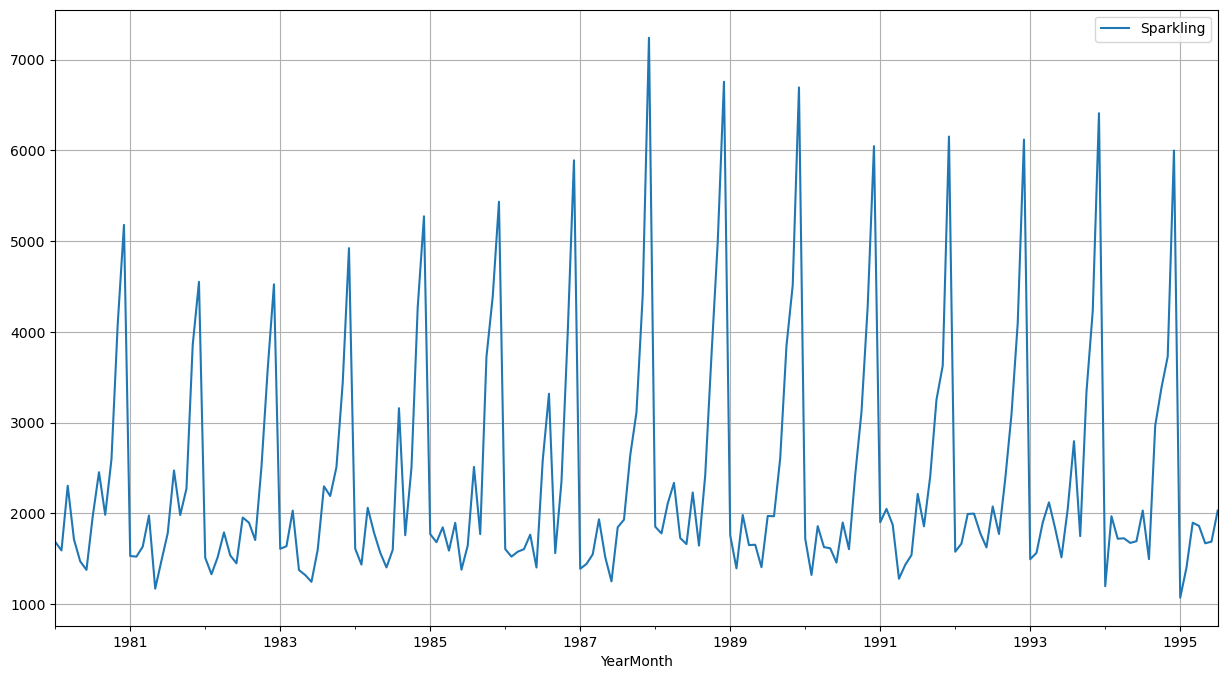

In [9]:
fig,ax = plt.subplots(figsize = (15,8))
spark.plot(ax= ax)
plt.grid()

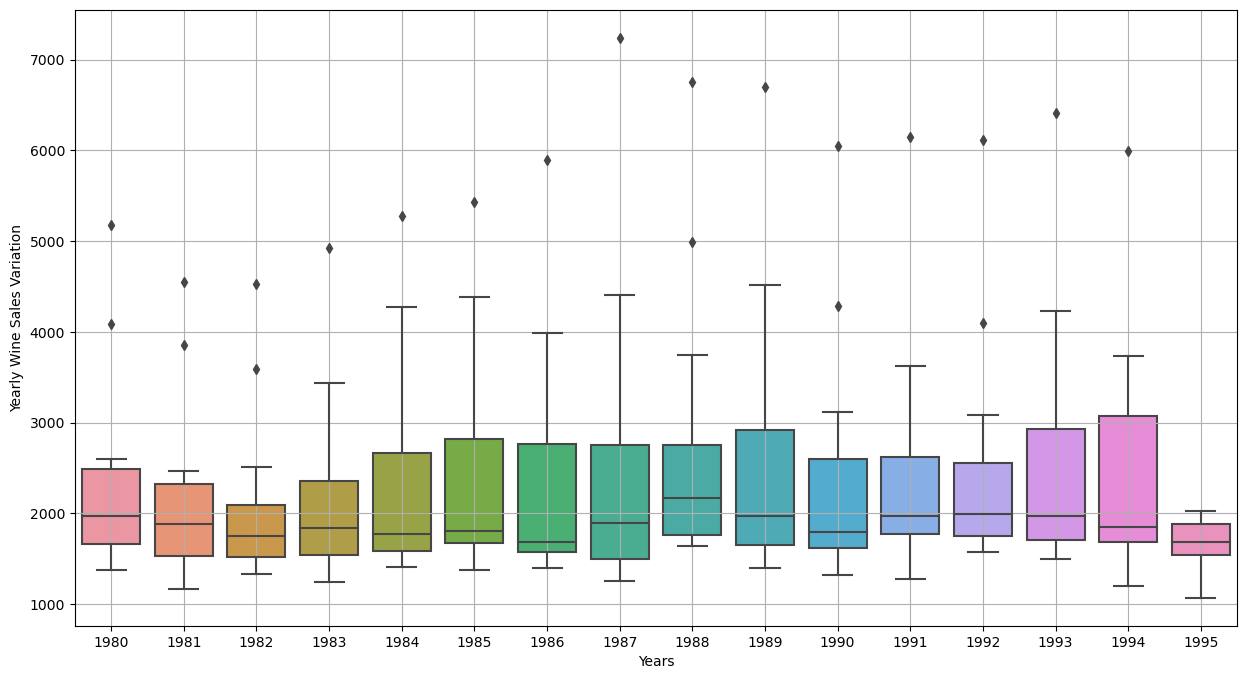

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(x=spark.index.year,y=spark['Sparkling'], ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

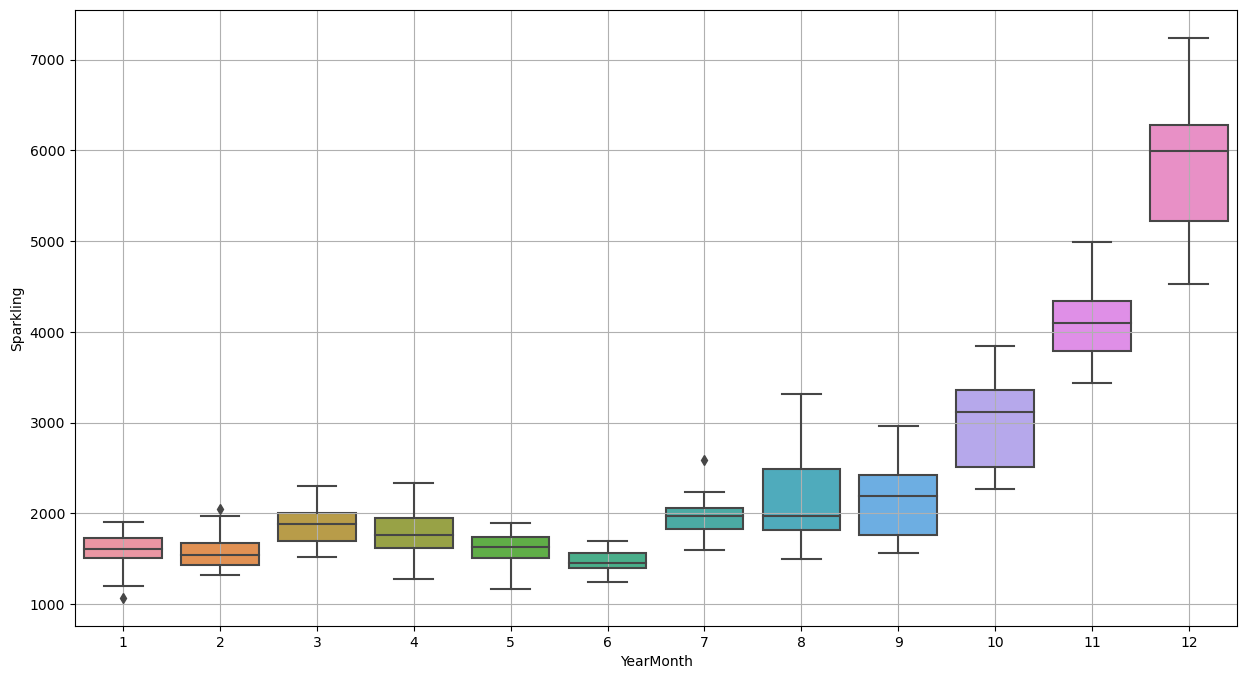

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(spark.index.month,spark['Sparkling'], ax=ax,whis=1.5)
plt.grid();

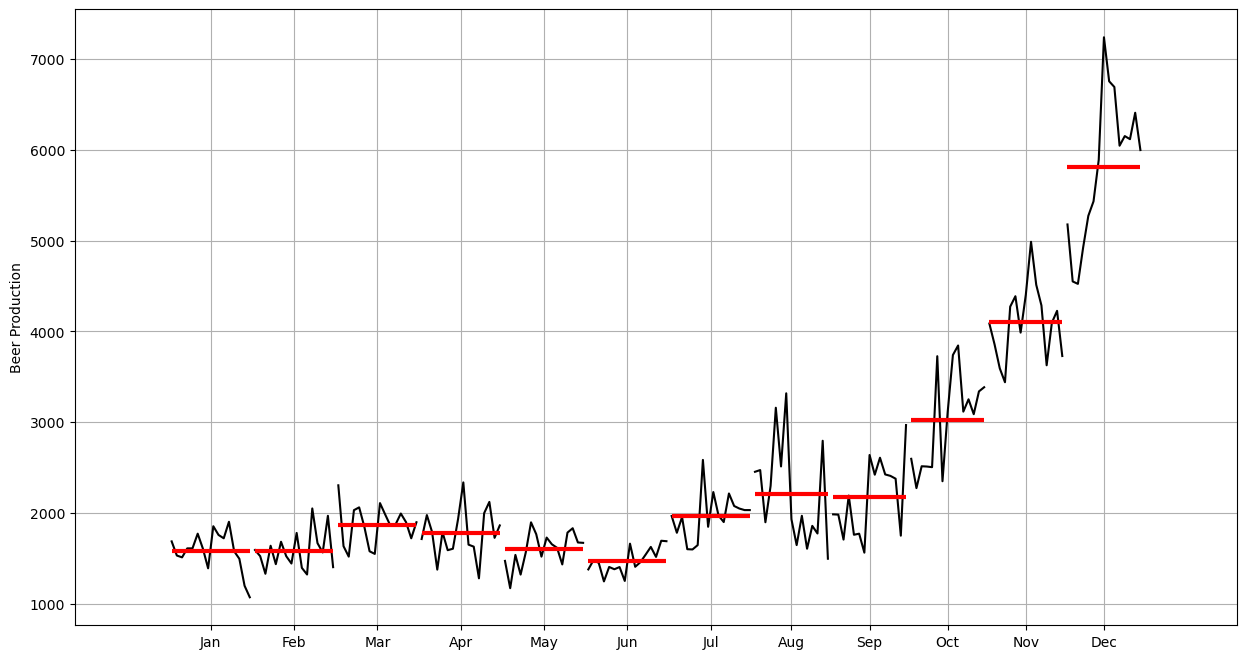

In [12]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(15,8))

month_plot(spark['Sparkling'],ylabel='Beer Production',ax=ax)
plt.grid();

In [13]:
yearly_sales_x_month=pd.pivot_table(spark,values=['Sparkling'],index=spark.index.year,columns=spark.index.month)

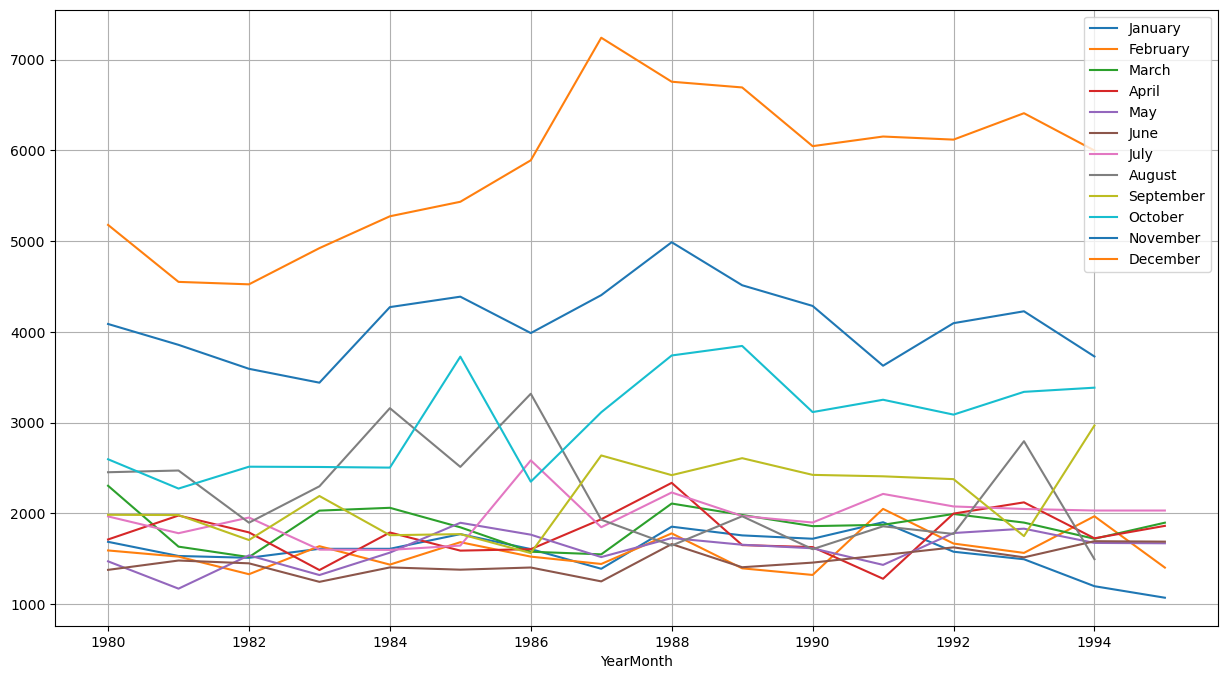

In [14]:
fig, ax = plt.subplots(figsize=(15,8))

yearly_sales_x_month.plot(ax =ax);
labels = spark.index.month_name()
plt.grid();
plt.legend(labels)

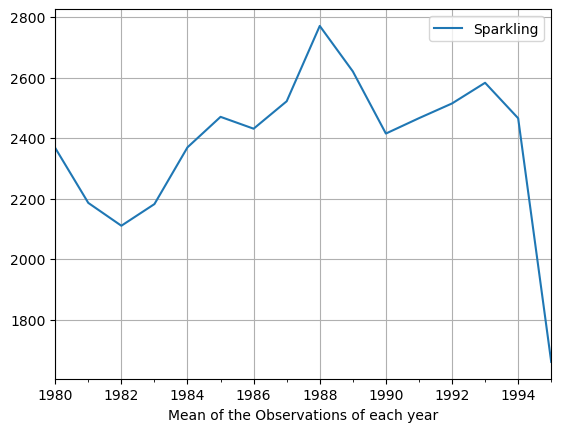

In [14]:
spark_yearly_sum = spark.resample('A').mean()
spark_yearly_sum.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

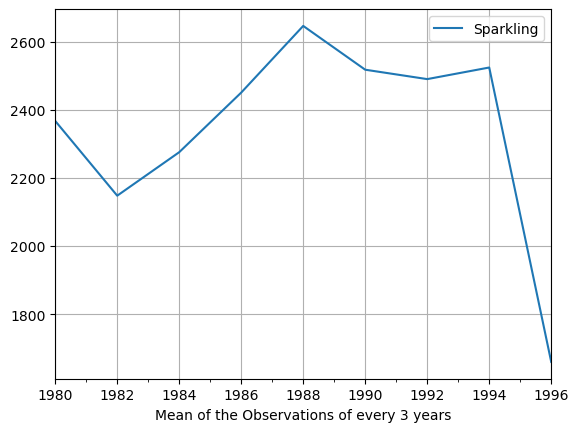

In [15]:
spark_3_years = spark.resample('2Y').mean()
spark_3_years.plot()
plt.grid()
plt.xlabel('Mean of the Observations of every 3 years');

In [16]:
spark[spark.index.year>=1995]

Sparkling
YearMonth            
1995-01-01       1070
1995-02-01       1402
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

### Decomposition of Time Series

In [17]:
from pylab import rcParams 
rcParams['figure.figsize'] = 15,8

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
decompose = seasonal_decompose(spark['Sparkling'],model='additive')

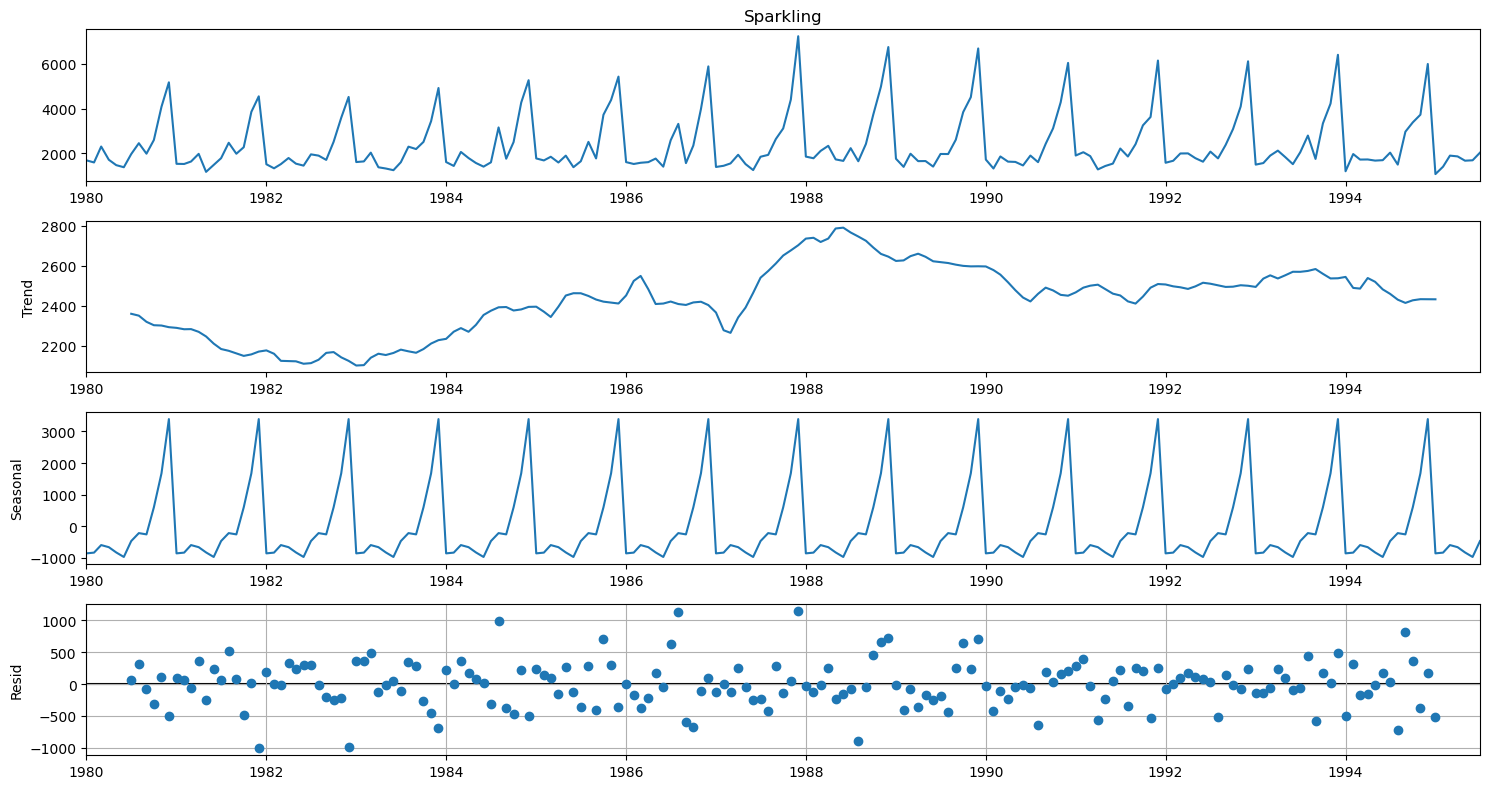

In [20]:
decompose.plot()
plt.grid();

In [21]:
decompose = seasonal_decompose(spark['Sparkling'],model='mutiplicative')

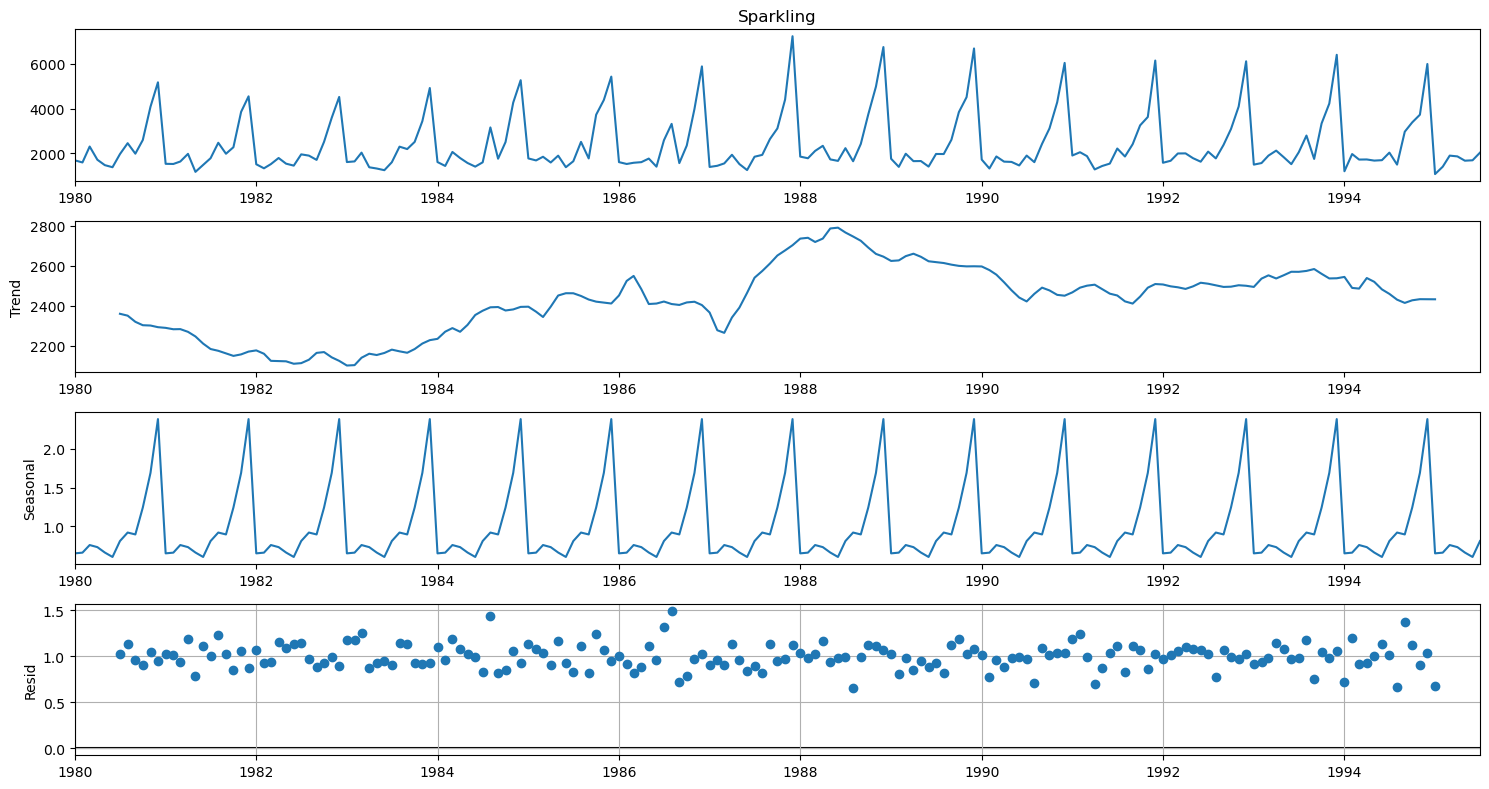

In [22]:
decompose.plot()
plt.grid();

In [23]:
trend = decompose.trend
seasonality = decompose.seasonal
residual = decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

### Splitting the Data in Train and Test set

In [24]:
train = spark[spark.index<'1991']
test = spark[spark.index>='1991']

In [25]:
print('First five rows of train data\n'+'-'*50+'\n',train.head(),'\n')
print('Last five rows of train data\n'+'-'*50+'\n',train.tail(),'\n')
print('First five rows of test data\n'+'-'*50+'\n',test.head(),'\n')
print('Last five rows of test data\n'+'-'*50+'\n',test.tail())
# just to verify if the splitting is done correctly

First five rows of train data
--------------------------------------------------
             Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471 

Last five rows of train data
--------------------------------------------------
             Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047 

First five rows of test data
--------------------------------------------------
             Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432 

Last five rows of test data
--------------------------------------------------
             Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031


In [26]:
print('The number of rows in the train set are {}'.format(train.shape[0]))
print('The number of rows in the test set are {}'.format(test.shape[0]))

The number of rows in the train set are 132
The number of rows in the test set are 55


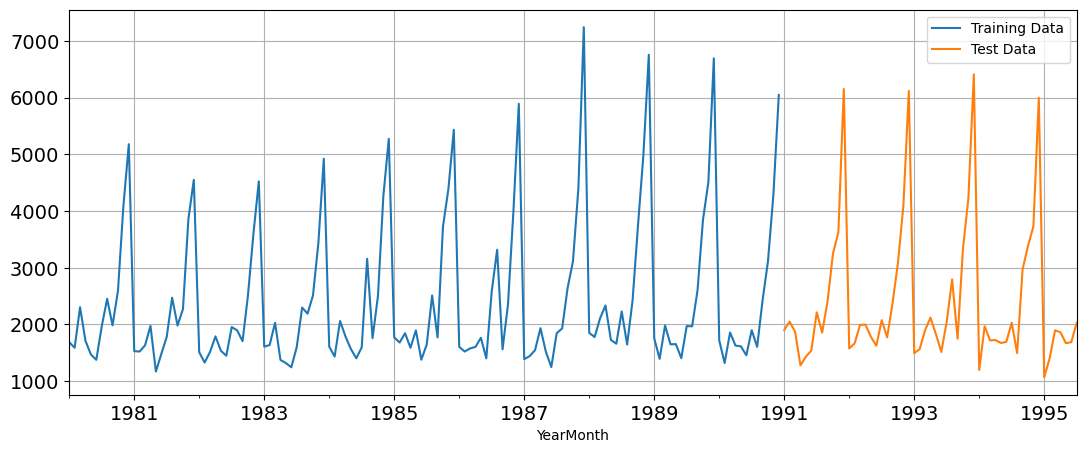

In [27]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the metrics

### Model 1: Linear Regression

In [28]:
train_lr = train.copy()
train_lr['LR'] = np.arange(0,len(train['Sparkling']))

In [29]:
test_lr = test.copy()
test_lr['LR'] = np.arange(0,len(test['Sparkling']))

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(train_lr[['LR']],train_lr['Sparkling'].values)

LinearRegression()

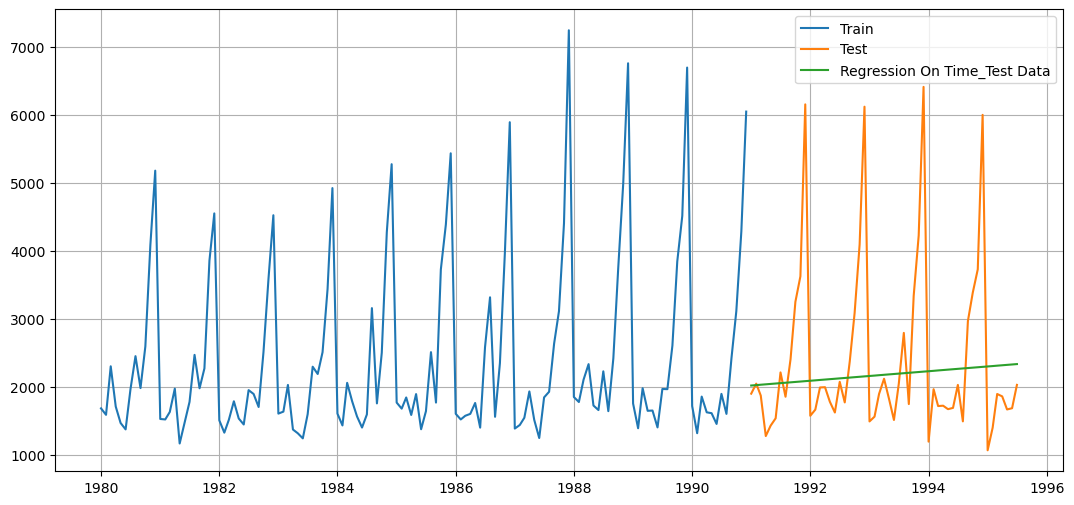

In [33]:
test_pred_LR         = lr.predict(test_lr[['LR']])
test_lr['RegOnTime'] = test_pred_LR

plt.figure(figsize=(13,6))
plt.plot(train_lr['Sparkling'], label='Train')
plt.plot(test_lr['Sparkling'], label='Test')
plt.plot(test_lr['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [34]:
from sklearn import metrics

In [35]:
## Test Data - RMSE

rmse_lr_test = metrics.mean_squared_error(test_lr['Sparkling'],test_pred_LR,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %.3f" %(rmse_lr_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1294.440


In [36]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['RegressionOnTime'])
resultsDf

Test RMSE
RegressionOnTime  1294.440103

### Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

In [37]:
train_naive = train.copy()
test_naive = test.copy()

In [38]:
test_naive['naive'] = train['Sparkling'][-1]

In [39]:
test_naive.head()

Sparkling  naive
YearMonth                   
1991-01-01       1902   6047
1991-02-01       2049   6047
1991-03-01       1874   6047
1991-04-01       1279   6047
1991-05-01       1432   6047

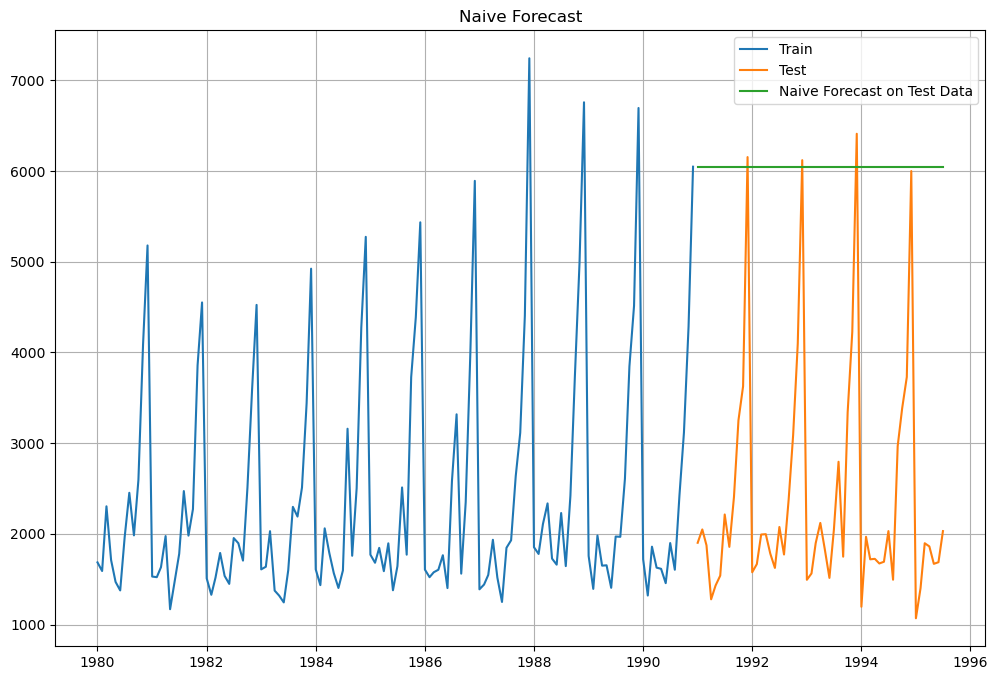

In [40]:
plt.figure(figsize=(12,8))
plt.plot(train_naive['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(test_naive['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [41]:
## Test Data - RMSE

rmse_naive_test = metrics.mean_squared_error(test_naive['Sparkling'],test_naive['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %.3f" %(rmse_naive_test))

For Naive forecast on the Test Data,  RMSE is 3864.279


In [42]:
resultsDf.loc['NaiveModel'] = {'Test RMSE': rmse_naive_test}
resultsDf

Test RMSE
RegressionOnTime  1294.440103
NaiveModel        3864.279352

### Model 3: Simple Average

In [43]:
train_SA = train.copy()
test_SA = test.copy()

In [44]:
test_SA['mean_forecast'] = train_SA['Sparkling'].mean()
test_SA.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

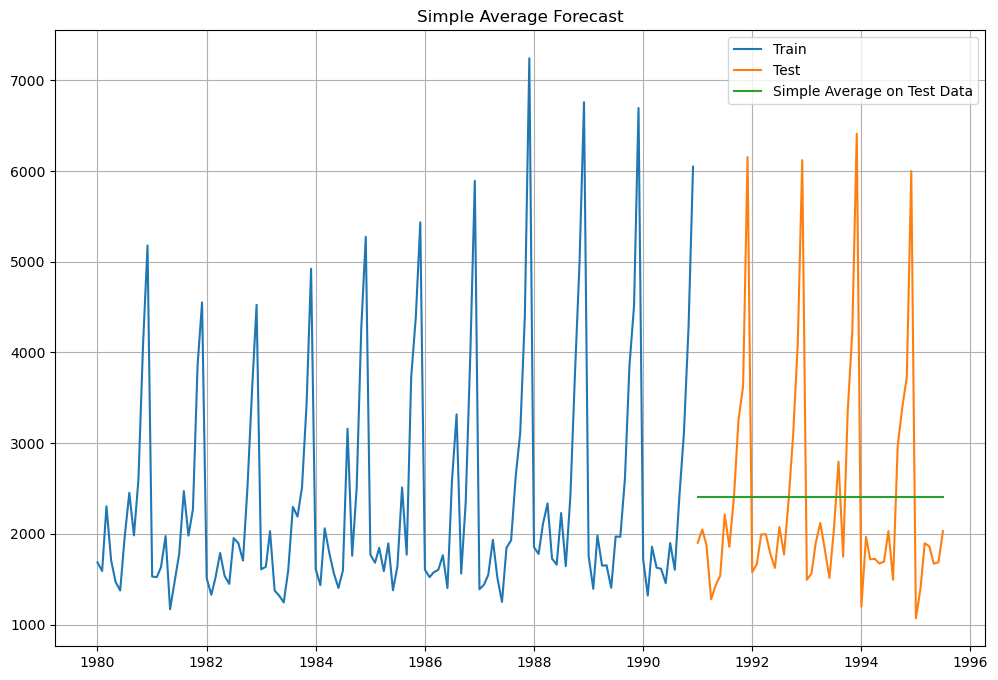

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train_SA['Sparkling'], label='Train')
plt.plot(test_SA['Sparkling'], label='Test')
plt.plot(test_SA['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation

In [46]:
## Test Data - RMSE

rmse_SA_test = metrics.mean_squared_error(test_SA['Sparkling'],test_SA['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %.3f" %(rmse_SA_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [47]:
resultsDf.loc['SimpleAverage'] = {'Test RMSE': rmse_SA_test}
resultsDf

Test RMSE
RegressionOnTime  1294.440103
NaiveModel        3864.279352
SimpleAverage     1275.081804

### Model 4: Moving Average(MA)

In [48]:
MA_model = spark.copy()
MA_model.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [49]:

MA_model['Trailing_2'] = MA_model['Sparkling'].rolling(2).mean()
MA_model['Trailing_4'] = MA_model['Sparkling'].rolling(4).mean()
MA_model['Trailing_6'] = MA_model['Sparkling'].rolling(6).mean()
MA_model['Trailing_9'] = MA_model['Sparkling'].rolling(9).mean()

MA_model.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

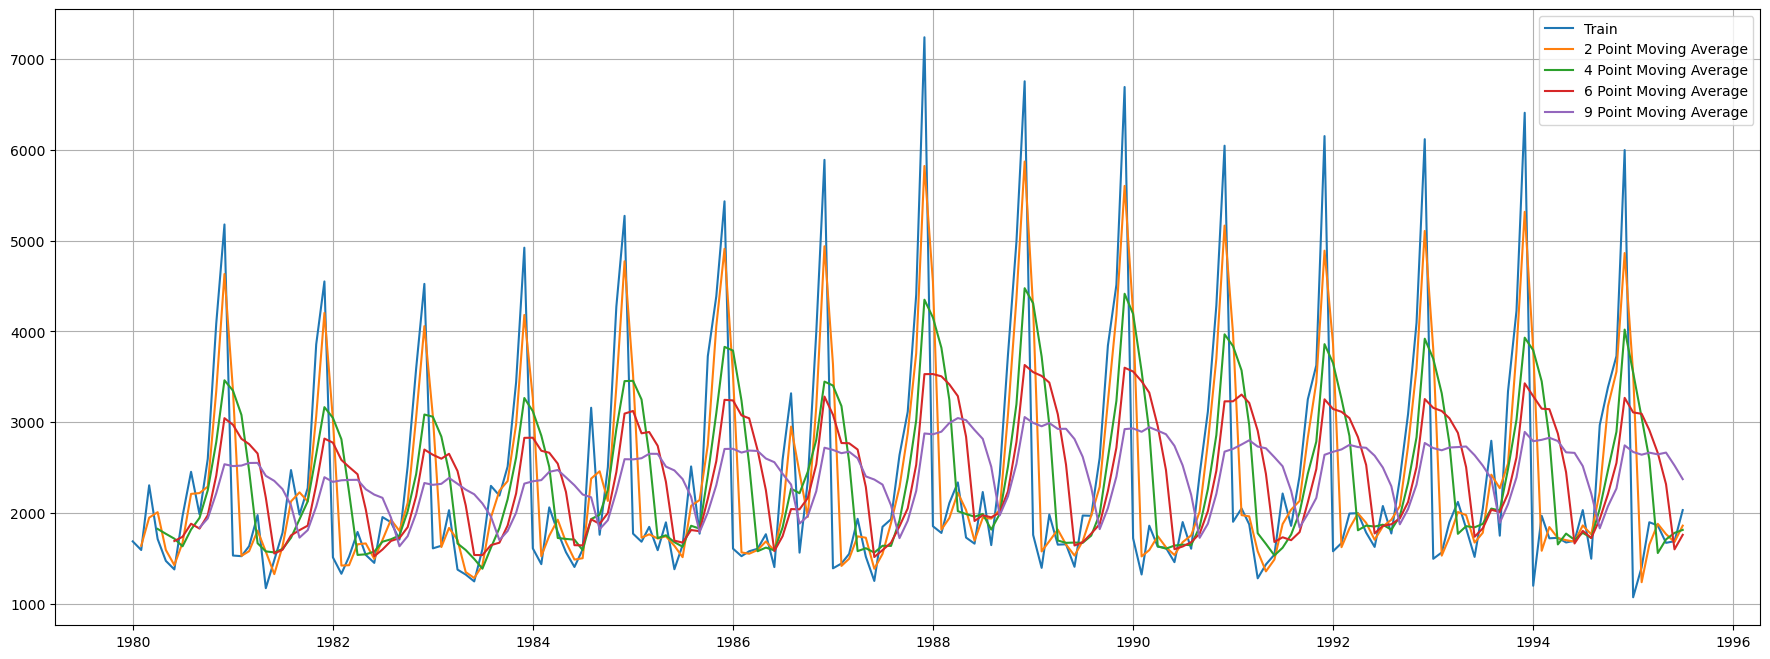

In [50]:
## Plotting on the whole data

plt.figure(figsize=(22,8))
plt.plot(MA_model['Sparkling'], label='Train')
plt.plot(MA_model['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_model['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_model['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MA_model['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [51]:
#Creating train and test set 
trailing_MA_model_train=MA_model[MA_model.index<'1991'] 
trailing_MA_model_test=MA_model[MA_model.index>='1991']

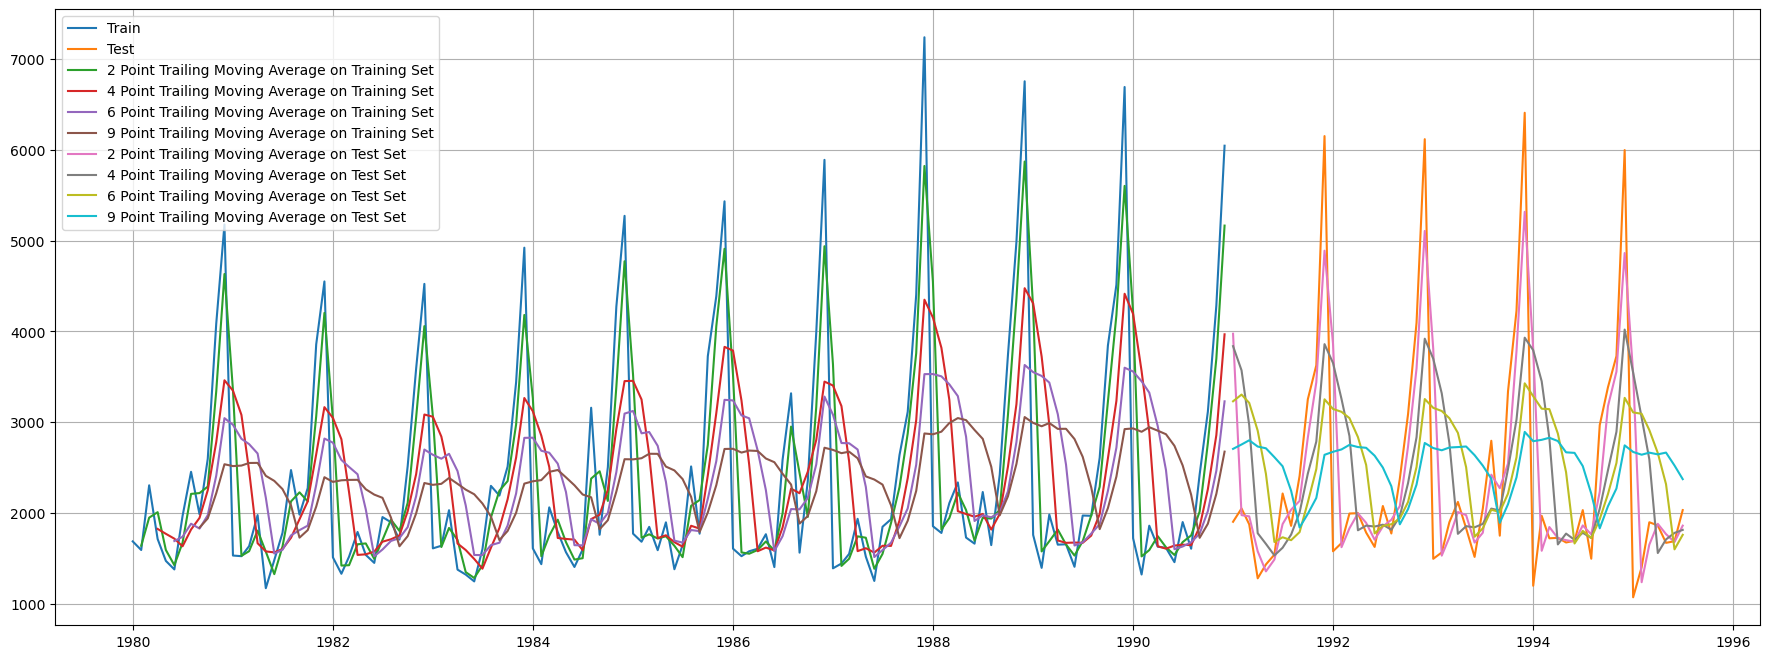

In [52]:
## Plotting on both the Training and Test data

plt.figure(figsize=(22,8))
plt.plot(trailing_MA_model_train['Sparkling'], label='Train')
plt.plot(trailing_MA_model_test['Sparkling'], label='Test')

plt.plot(trailing_MA_model_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MA_model_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MA_model_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MA_model_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation

In [53]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MA_model_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MA_model_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MA_model_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f" %(rmse_MA_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MA_model_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %0.3f " %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [54]:
resultsDf.loc['2pointTrailingMovingAverageBest'] = {'Test RMSE' : rmse_MA_test_2 }
# resultsDf.loc['4pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_4 }
# resultsDf.loc['6pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_6 }
# resultsDf.loc['9pointTrailingMovingAverage'] = {'Test RMSE' : rmse_MA_test_9 }

In [55]:
resultsDf

Test RMSE
RegressionOnTime                 1294.440103
NaiveModel                       3864.279352
SimpleAverage                    1275.081804
2pointTrailingMovingAverageBest   813.400684

## Visualization of all the models built till this stage (before moving on Exponential Smoothing Models )

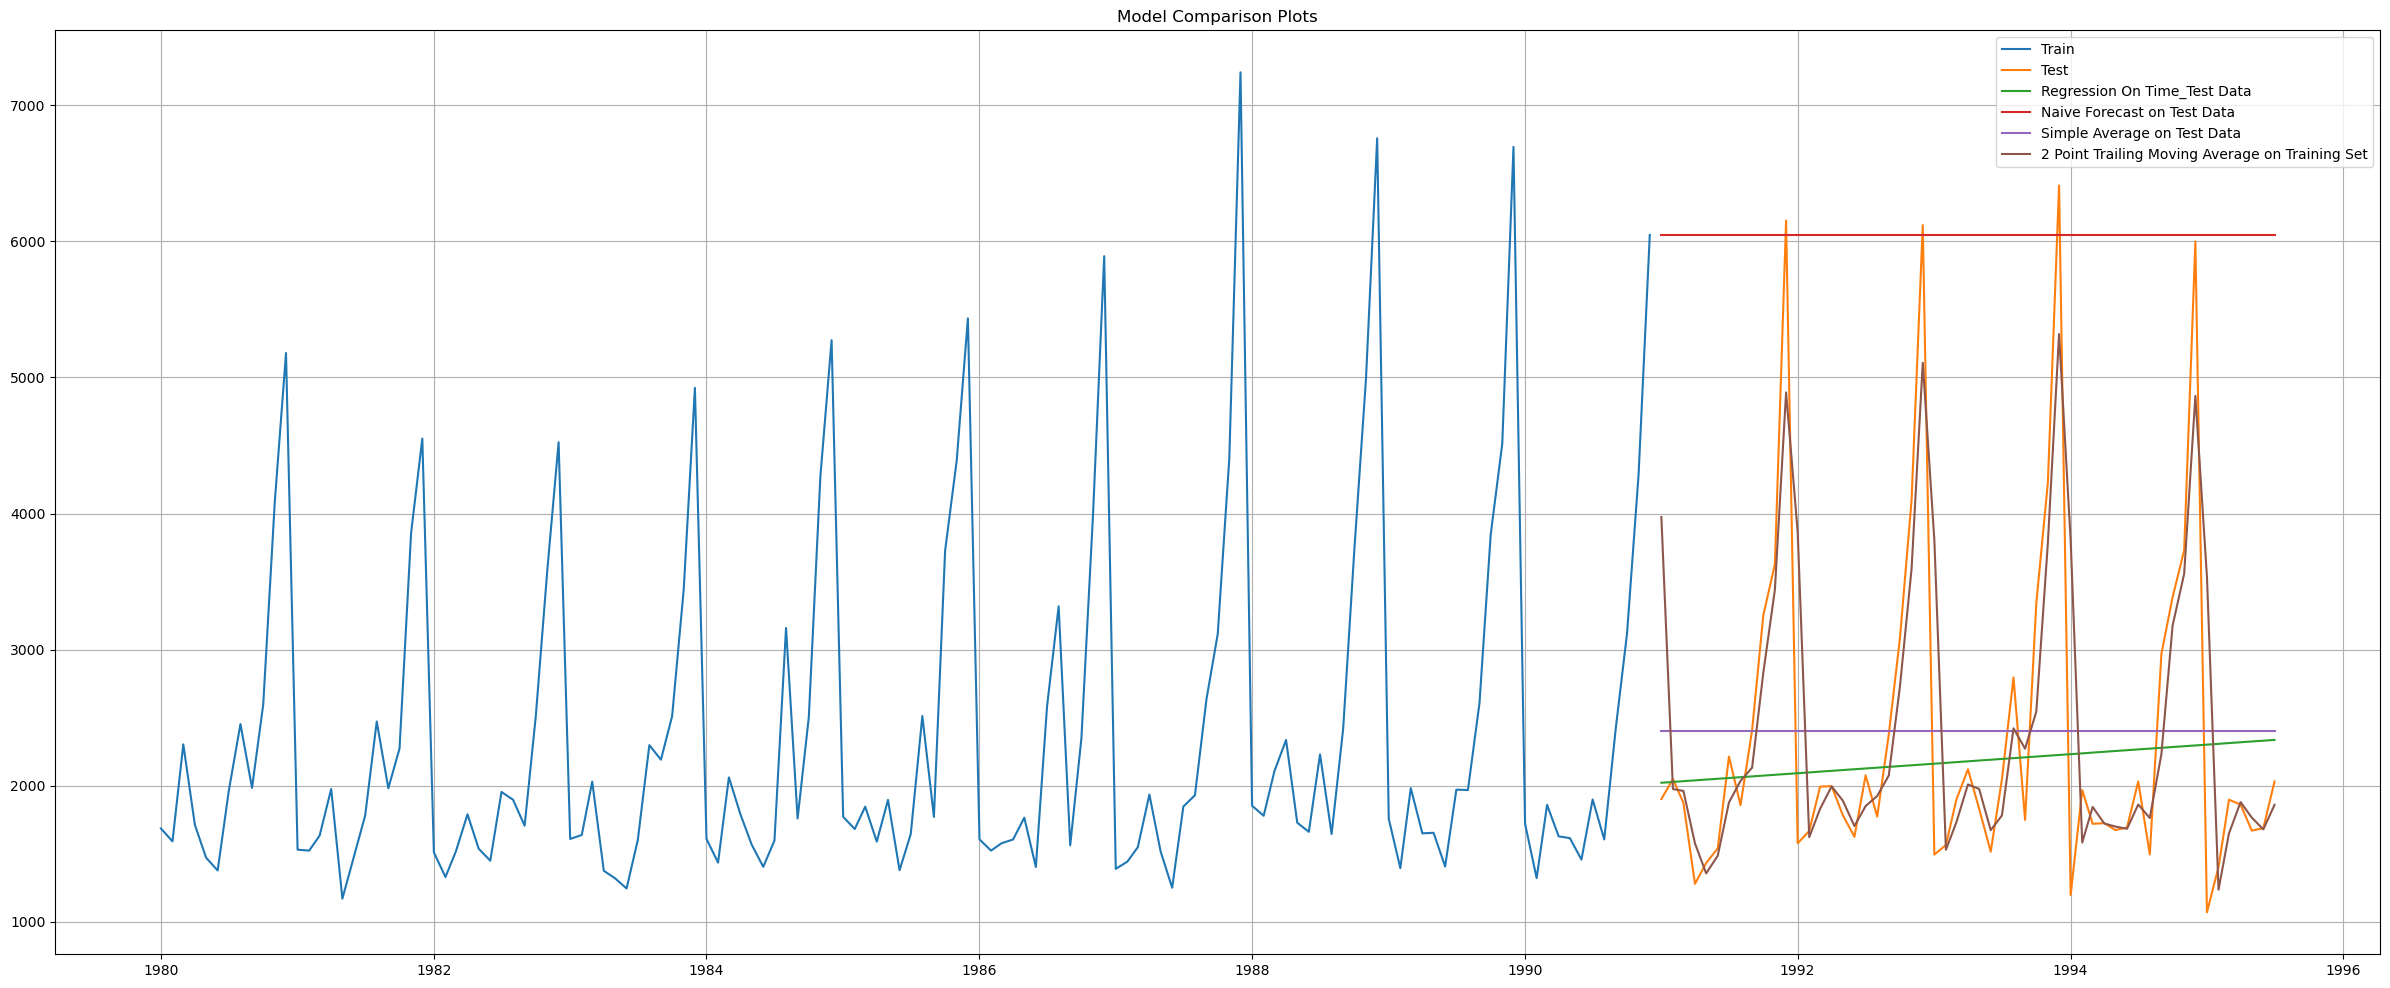

In [56]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test_lr['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(test_naive['naive'], label='Naive Forecast on Test Data')

plt.plot(test_SA['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MA_model_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Exponential Smoothing Models

In [57]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### Model 5: Simple Exponential Smoothing Model

In [58]:
SES_train = train.copy()
SES_test = test.copy()

In [59]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [60]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [61]:
model_SES_autofit.params

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head().round()

Sparkling  predict
YearMonth                     
1991-01-01       1902   2725.0
1991-02-01       2049   2725.0
1991-03-01       1874   2725.0
1991-04-01       1279   2725.0
1991-05-01       1432   2725.0

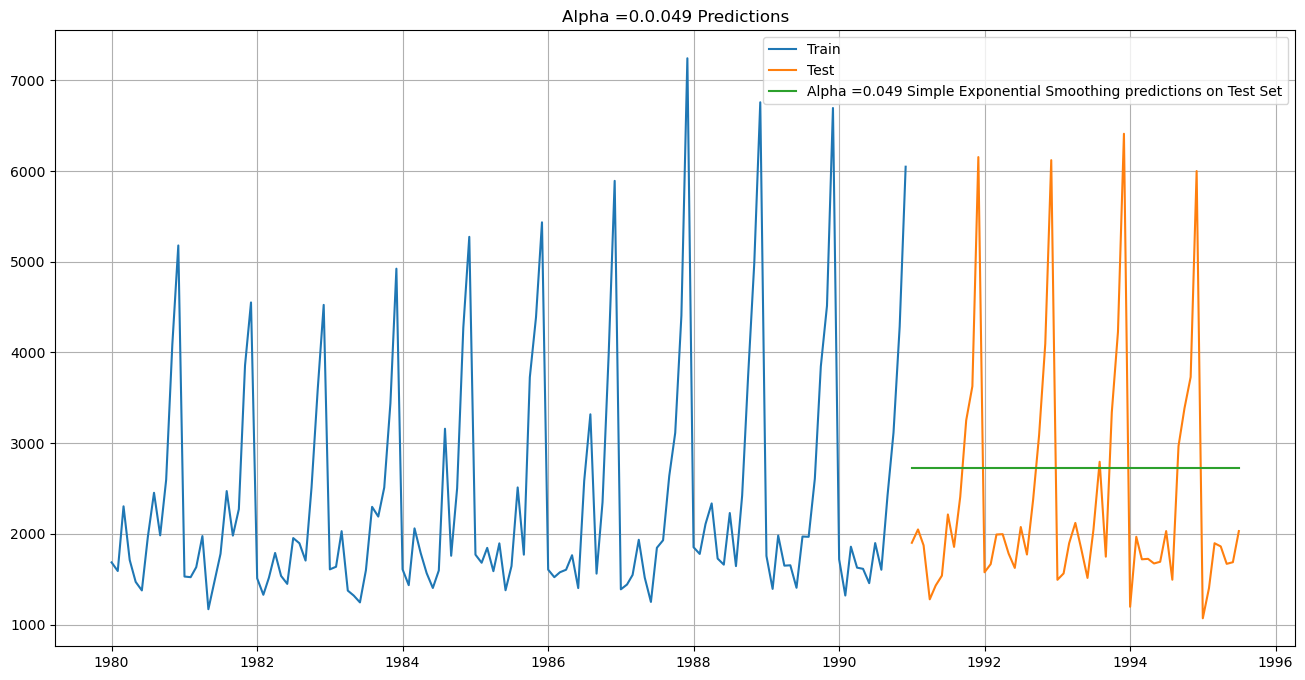

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.049 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0.049 Predictions');

### Model Evaluation

In [64]:
## Test Data

rmse_SES_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_SES_test_1))

For Alpha =0.049 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [65]:
resultsDf.loc['alpha:0.0496 SES model'] = {'Test RMSE' : rmse_SES_test_1}

In [66]:
resultsDf

Test RMSE
RegressionOnTime                 1294.440103
NaiveModel                       3864.279352
SimpleAverage                    1275.081804
2pointTrailingMovingAverageBest   813.400684
alpha:0.0496 SES model           1316.035487

Performance on other alpha values can be checked manually. Here we have created a loop for picking up the alpha values and return the RMSE value for that alpha

In [67]:
## First we will define an empty dataframe to store our values from the loop

results_alpha = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [68]:
for i in np.arange(0,0.1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    results_alpha = results_alpha.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

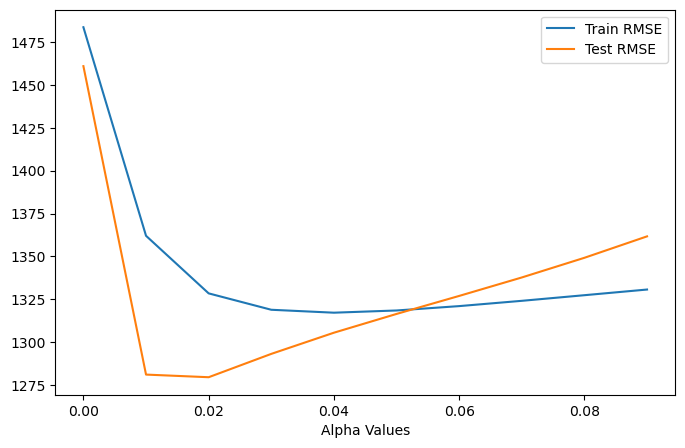

In [69]:
_,ax = plt.subplots(figsize = [8,5])
results_alpha.set_index('Alpha Values').plot(ax=ax);

In [70]:
results_alpha.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
2          0.02  1328.406554  1279.495201
1          0.01  1361.997529  1281.032699
3          0.03  1318.846031  1293.110073
4          0.04  1317.138929  1305.462953
5          0.05  1318.429335  1316.411742
6          0.06  1320.978240  1326.919366
7          0.07  1324.062570  1337.684405
8          0.08  1327.343381  1349.163420
9          0.09  1330.646063  1361.662607
0          0.00  1483.667178  1460.954675

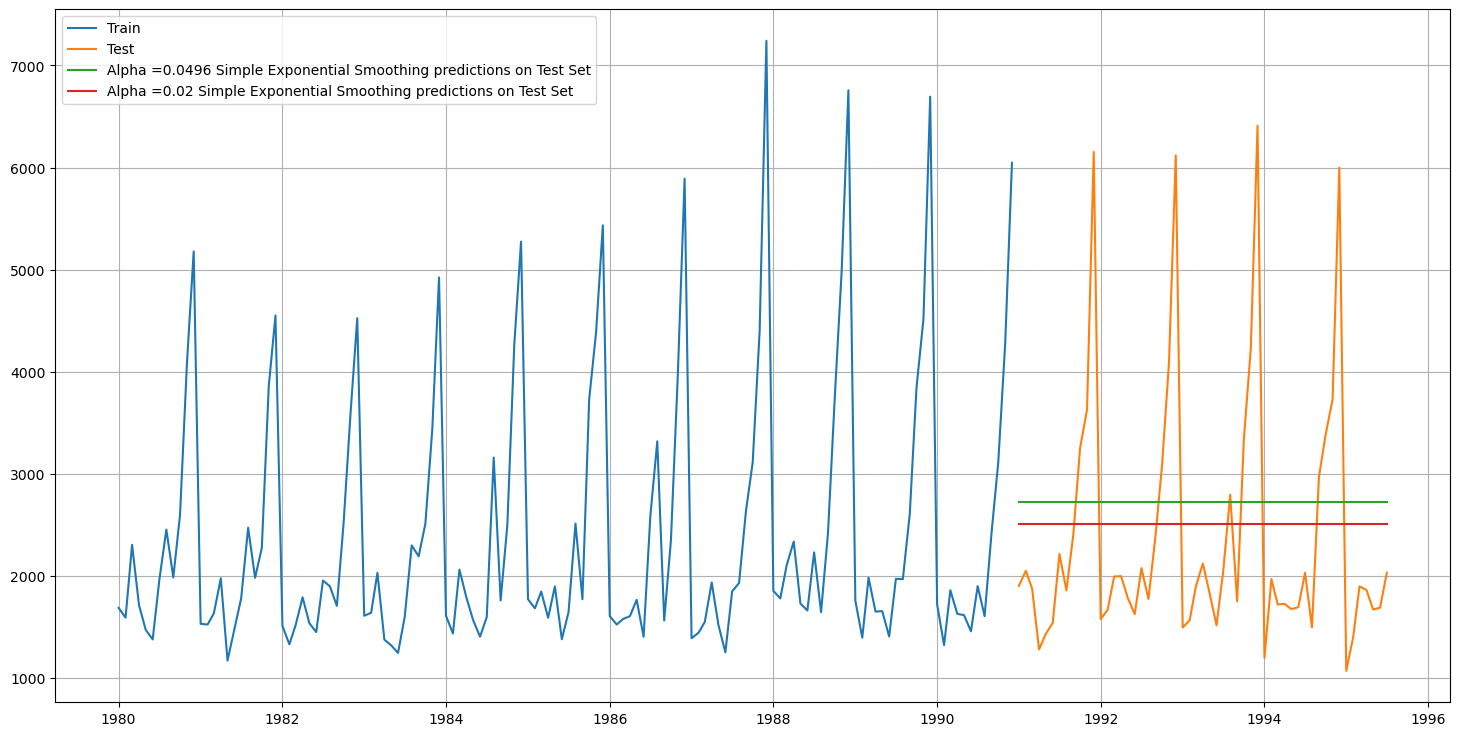

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.02], label='Alpha =0.02 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [72]:
## Test Data

rmse_SES_test_2 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',0.02],squared=False)
print("For Alpha =0.02 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_SES_test_2))

For Alpha =0.02 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1279.495


In [73]:
resultsDf.loc['alpha:0.02 SES model'] = {'Test RMSE' : rmse_SES_test_2}

In [74]:
resultsDf

Test RMSE
RegressionOnTime                 1294.440103
NaiveModel                       3864.279352
SimpleAverage                    1275.081804
2pointTrailingMovingAverageBest   813.400684
alpha:0.0496 SES model           1316.035487
alpha:0.02 SES model             1279.495201

## Model 6: Double exponential smoothing method

##### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
model_DES = Holt(DES_train['Sparkling'])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
model_DES_autofit = model_DES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [78]:
model_DES_autofit.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head().round()

Sparkling  predict
YearMonth                     
1991-01-01       1902   5221.0
1991-02-01       2049   5128.0
1991-03-01       1874   5034.0
1991-04-01       1279   4941.0
1991-05-01       1432   4848.0

### Model Evaluation

In [80]:
## Test Data

rmse_DES_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha =0.688,beta = 9.9e-05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_DES_test_1))

For Alpha =0.688,beta = 9.9e-05 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 2007.239


In [81]:
resultsDf.loc['alpha:0.688,beta:9.9e-05 DES model'] = {'Test RMSE' : rmse_DES_test_1}

In [82]:
resultsDf

Test RMSE
RegressionOnTime                    1294.440103
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2pointTrailingMovingAverageBest      813.400684
alpha:0.0496 SES model              1316.035487
alpha:0.02 SES model                1279.495201
alpha:0.688,beta:9.9e-05 DES model  2007.238526

In [83]:
## First we will define an empty dataframe to store our values from the loop

results_alpha_beta = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha_beta

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [84]:
#### RUN THIS IF YOU WANT TO SEARCH AGAIN #####


# for i in np.arange(0.0,0.10,0.01):
#     for j in np.arange(0.003,.011,0.001):
#         i= i.round(1)
#         model_DES_alpha_i = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
#         DES_train['predict',i,j] = model_DES_alpha_i.fittedvalues
#         DES_test['predict',i,j] = model_DES_alpha_i.forecast(steps=55)

#         rmse_DES_train_i_j = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)

#         rmse_DES_test_i_j = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)

#         results_alpha_beta = results_alpha_beta.append({'Alpha Values': i,
#                                                         'Beta Values': j,
#                                                         'Train RMSE':rmse_DES_train_i_j,
#                                                         'Test RMSE':rmse_DES_test_i_j}, ignore_index=True)

In [85]:
i=0.1
j=0.01
model_DES_alpha_i = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
DES_train['predict',i,j] = model_DES_alpha_i.fittedvalues
DES_test['predict',i,j] = model_DES_alpha_i.forecast(steps=55)

rmse_DES_train_i_j = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)

rmse_DES_test_i_j = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)

results_alpha_beta = results_alpha_beta.append({'Alpha Values': i,
                                                'Beta Values': j,
                                                'Train RMSE':rmse_DES_train_i_j,
                                                'Test RMSE':rmse_DES_test_i_j}, ignore_index=True)

In [86]:
results_alpha_beta.sort_values(by=['Test RMSE'],ascending=True).head()

Alpha Values  Beta Values   Train RMSE    Test RMSE
0           0.1         0.01  1466.128368  1325.222574

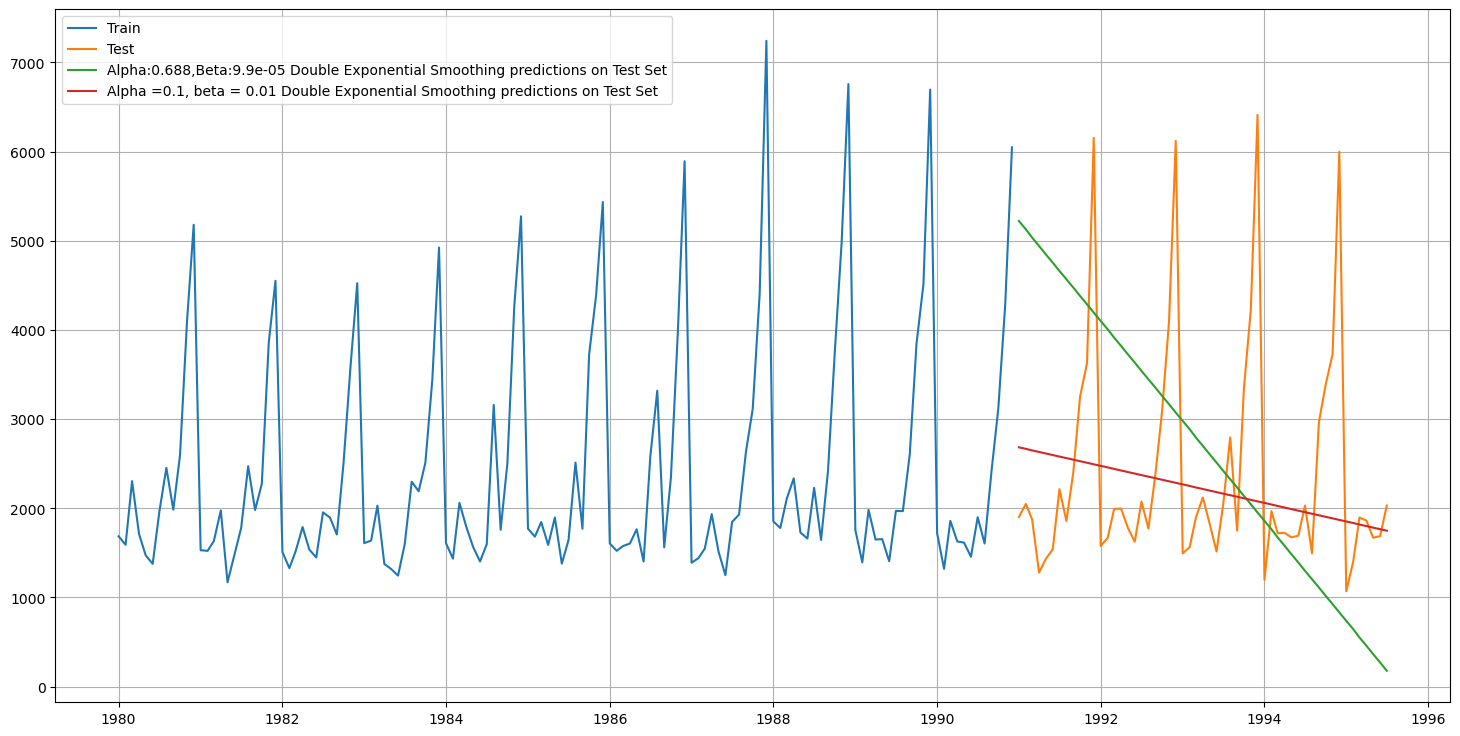

In [87]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha:0.688,Beta:9.9e-05 Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict',0.1,0.01], label='Alpha =0.1, beta = 0.01 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();

### Model Evalaution after searching parameters

In [88]:
## Test Data

rmse_DES_test_2 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',0.1,0.01],squared=False)
print("For Alpha =0.1,beta=0.01 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %0.3f" %(rmse_DES_test_2))

For Alpha =0.1,beta=0.01 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 1325.223


In [89]:
resultsDf.loc['alpha:0.1,beta:0.01 DES model'] = {'Test RMSE' : rmse_DES_test_2}

In [90]:
resultsDf

Test RMSE
RegressionOnTime                    1294.440103
NaiveModel                          3864.279352
SimpleAverage                       1275.081804
2pointTrailingMovingAverageBest      813.400684
alpha:0.0496 SES model              1316.035487
alpha:0.02 SES model                1279.495201
alpha:0.688,beta:9.9e-05 DES model  2007.238526
alpha:0.1,beta:0.01 DES model       1325.222574

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [91]:
TES_train = train.copy()
TES_test = test.copy()

In [92]:
model_TES = ExponentialSmoothing(endog=TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

In [93]:
model_TES_autofit = model_TES.fit()

In [94]:
model_TES_autofit.params

{'smoothing_level': 0.11133818361298699,
 'smoothing_trend': 0.049505131019509915,
 'smoothing_seasonal': 0.3620795793580111,
 'damping_trend': nan,
 'initial_level': 2356.4967888704355,
 'initial_trend': -10.187944726007238,
 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
        0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
        1.87340336, 2.37811768]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head().round()

Sparkling  auto_predict
YearMonth                          
1991-01-01       1902        1587.0
1991-02-01       2049        1356.0
1991-03-01       1874        1763.0
1991-04-01       1279        1656.0
1991-05-01       1432        1542.0

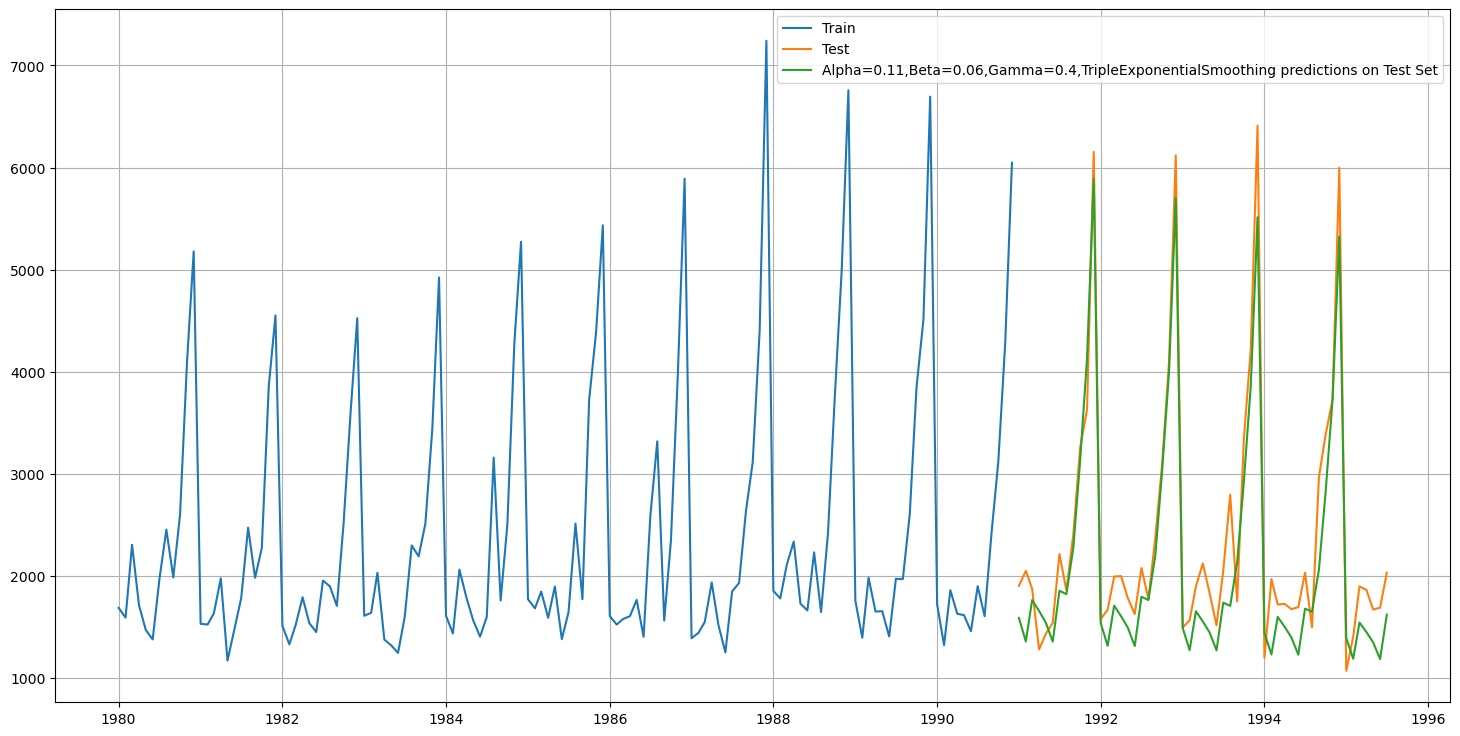

In [96]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [97]:
## Test Data

rmse_TES_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.11,Beta=0.06,Gamma=0.4, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_TES_test_1))

For Alpha=0.11,Beta=0.06,Gamma=0.4, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 404.287


In [98]:
results_TES_test_1 = pd.DataFrame({'Test RMSE': [rmse_TES_test_1]}
                           ,index=['Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_TES_test_1])
resultsDf

Test RMSE
RegressionOnTime                                    1294.440103
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverageBest                      813.400684
alpha:0.0496 SES model                              1316.035487
alpha:0.02 SES model                                1279.495201
alpha:0.688,beta:9.9e-05 DES model                  2007.238526
alpha:0.1,beta:0.01 DES model                       1325.222574
Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentia...   404.286809

In [99]:
## First we will define an empty dataframe to store our values from the loop

results_alpha_beta_gamma = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
results_alpha_beta_gamma

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [100]:
#### RUN THIS IF YOU WANT TO SEARCH AGAIN #####


# for i in np.arange(0.3,1.1,0.1):
#     for j in np.arange(0.003,0.030,0.001):
#         for k in np.arange(0.3,1.1,0.1):
#             model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
#             TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
#             TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
#             rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
#             rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
#             results_alpha_beta_gamma = results_alpha_beta_gamma.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
#                                                   'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
#                                                  , ignore_index=True)

In [101]:
i = 0.5
j = 0.027
k = 0.3

model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)

rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)

rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)

results_alpha_beta_gamma = results_alpha_beta_gamma.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                      'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                     , ignore_index=True)

In [102]:
results_alpha_beta_gamma.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE   Test RMSE
0           0.5        0.027           0.3  385.832712  318.878582

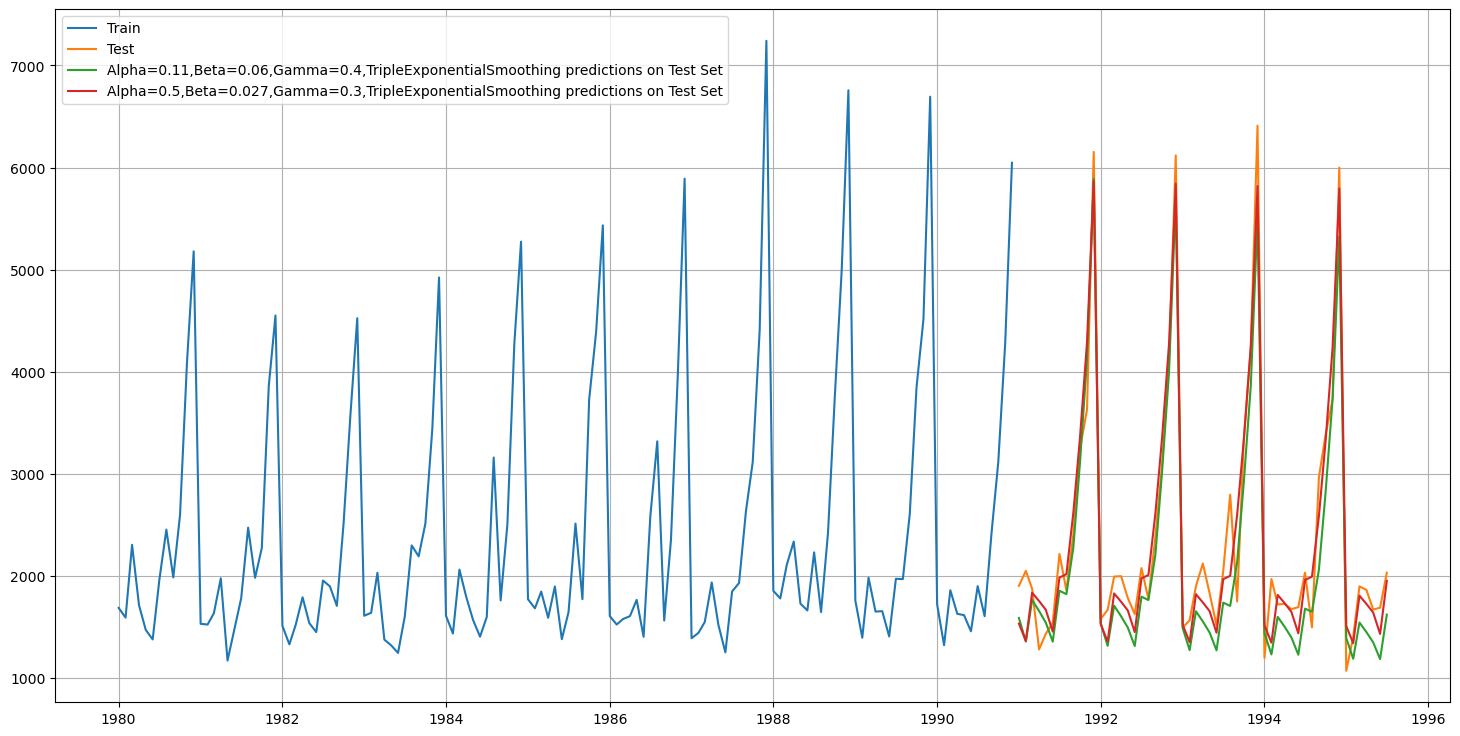

In [103]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['auto_predict'], label='Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.5, 0.027, 0.3], label='Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [104]:
results_TES_test_2= pd.DataFrame({'Test RMSE': [results_alpha_beta_gamma.sort_values(by=['Test RMSE']).values[0][4]]},index=['Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, results_TES_test_2])
resultsDf

Test RMSE
RegressionOnTime                                    1294.440103
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverageBest                      813.400684
alpha:0.0496 SES model                              1316.035487
alpha:0.02 SES model                                1279.495201
alpha:0.688,beta:9.9e-05 DES model                  2007.238526
alpha:0.1,beta:0.01 DES model                       1325.222574
Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentia...   404.286809
Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentia...   318.878582

***

# Check for Stationarity of Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [105]:
from statsmodels.tsa.stattools import adfuller

In [106]:
adftest = adfuller(spark,regression='ct')
print('DF test statistic is %3.3f' %adftest[0])
print('DF test p-value is' ,adftest[1])
print('Number of lags used' ,adftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932068
Number of lags used 12


In [107]:
# lets take difference of time series 

adftest = adfuller(spark.diff(1).dropna(),regression='ct')
print('DF test statistic is %3.3f' %adftest[0])
print('DF test p-value is' ,adftest[1])
print('Number of lags used' ,adftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


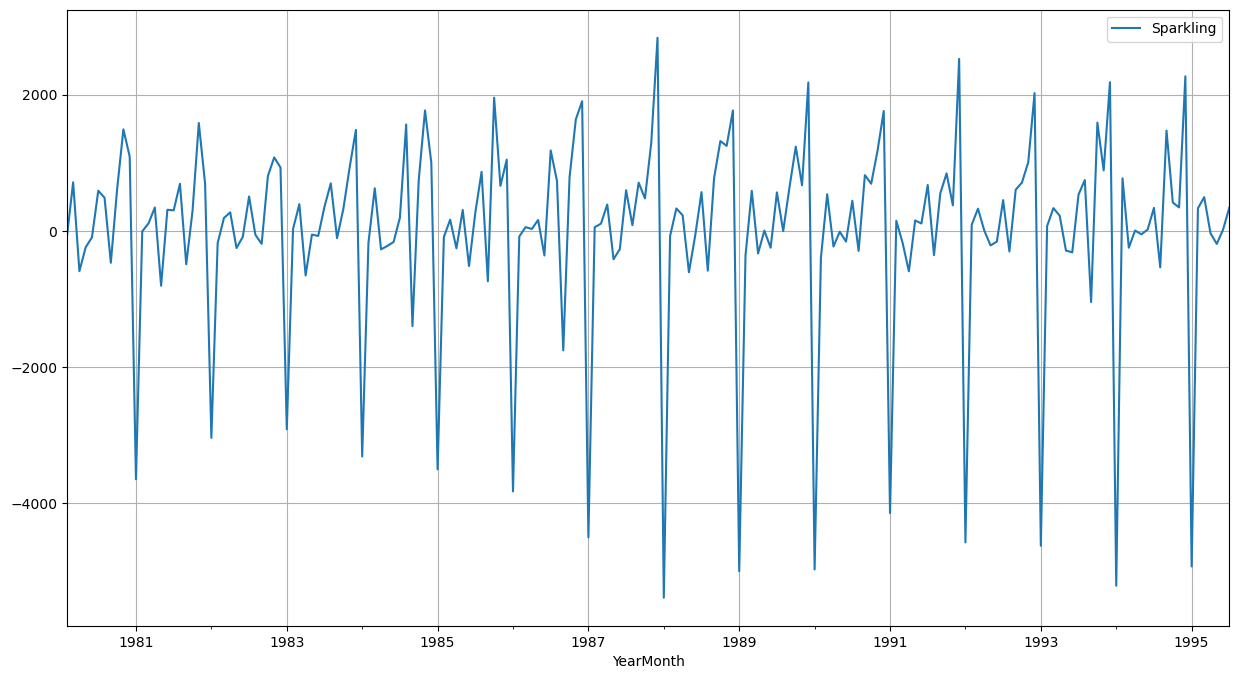

In [108]:
spark.diff().dropna().plot(grid=True);

# SARIMA MODEL (automated and based on AIC)

As we saw from above analysis that there is some amount of seasonality present in the time series model SARIMA model was chosen instead of ARIMA models

## Check for Stationarity of Train data

In [109]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

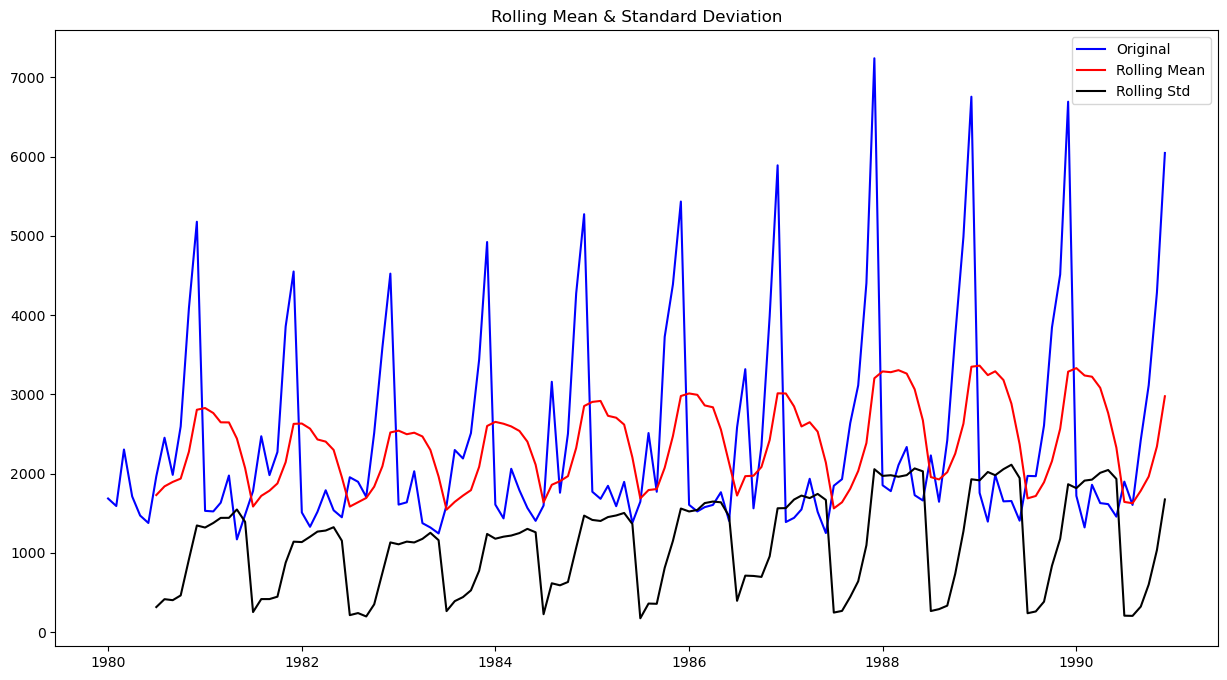

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [110]:
test_stationarity(train)

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

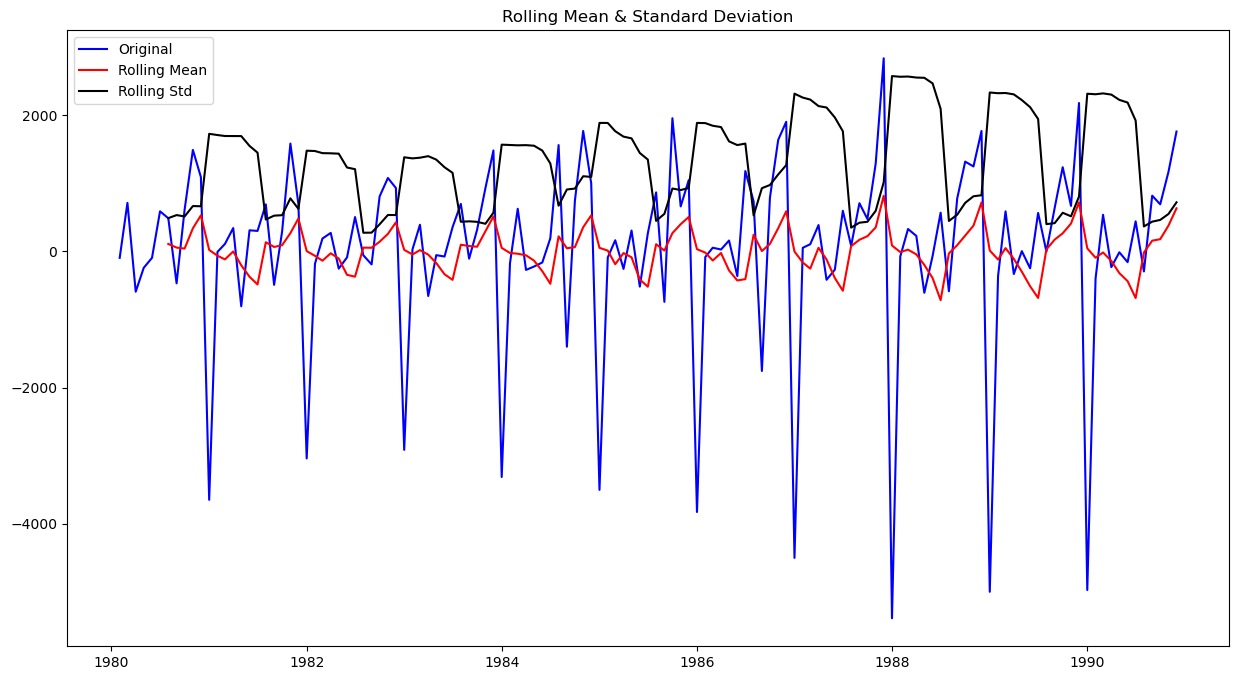

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [111]:
test_stationarity(train.diff().dropna())

We see that at  $\alpha$  = 0.05 the Time Series is indeed stationary.

In [112]:
from itertools import product

In [113]:
p =range(0,3)
q = range(0,3)
d = range(1,2)
pdq = list(product(p,d,q))
D = range(0,2)

PDQ = [(x[0], x[1], x[2], 12) for x in list(product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [114]:
# SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
# SARIMA_AIC

In [115]:
# import statsmodels.api as sm

# for param in pdq:
#     for param_seasonal in PDQ:
#         SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
            
#         results_SARIMA = SARIMA_model.fit(maxiter=1000)
#         print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
#         SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [116]:
# SARIMA_AIC.sort_values(by=['AIC']).head()

In [117]:
# for param = (1, 1, 2) ,param_Seasonal = (0, 1, 2, 12) AIC: 1382.34778
import statsmodels.api as sm
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(0,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -685.174
Date:                            Wed, 05 Apr 2023   AIC                           1382.348
Time:                                    16:56:10   BIC                           1397.479
Sample:                                01-01-1980   HQIC                          1388.455
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5507      0.287     -1.922      0.055      -1.112       0.011
ma.L1         -0.1612      0.235   

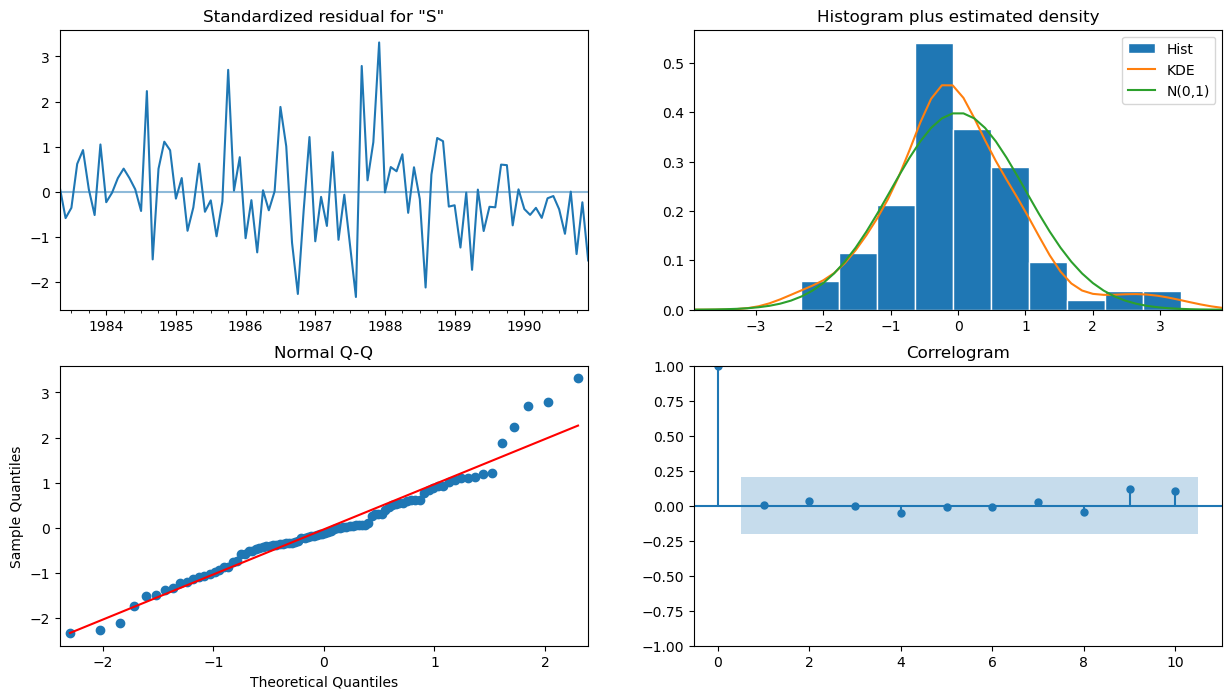

In [118]:
results_auto_SARIMA.plot_diagnostics();

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots

### Predict on the Test Set using this model and evaluate the model

In [119]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=55)

In [120]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  1460.244622  412.922801     650.930803    2269.558441
1991-02-01  1392.437144  429.721333     550.198808    2234.675481
1991-03-01  1743.201688  430.065899     900.288016    2586.115360
1991-04-01  1650.066909  433.930060     799.579619    2500.554200
1991-05-01  1522.656012  434.242947     671.555474    2373.756549

In [121]:
results_SARIMA_auto= pd.DataFrame({'Test RMSE':[metrics.mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)]},
                                 index=['SARIMA(1, 1, 2)(0, 1, 2, 12)'])

resultsDf = pd.concat([resultsDf, results_SARIMA_auto])
resultsDf

Test RMSE
RegressionOnTime                                    1294.440103
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverageBest                      813.400684
alpha:0.0496 SES model                              1316.035487
alpha:0.02 SES model                                1279.495201
alpha:0.688,beta:9.9e-05 DES model                  2007.238526
alpha:0.1,beta:0.01 DES model                       1325.222574
Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentia...   404.286809
Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentia...   318.878582
SARIMA(1, 1, 2)(0, 1, 2, 12)                         382.576745

# Check for Stationarity of whole Time Series

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

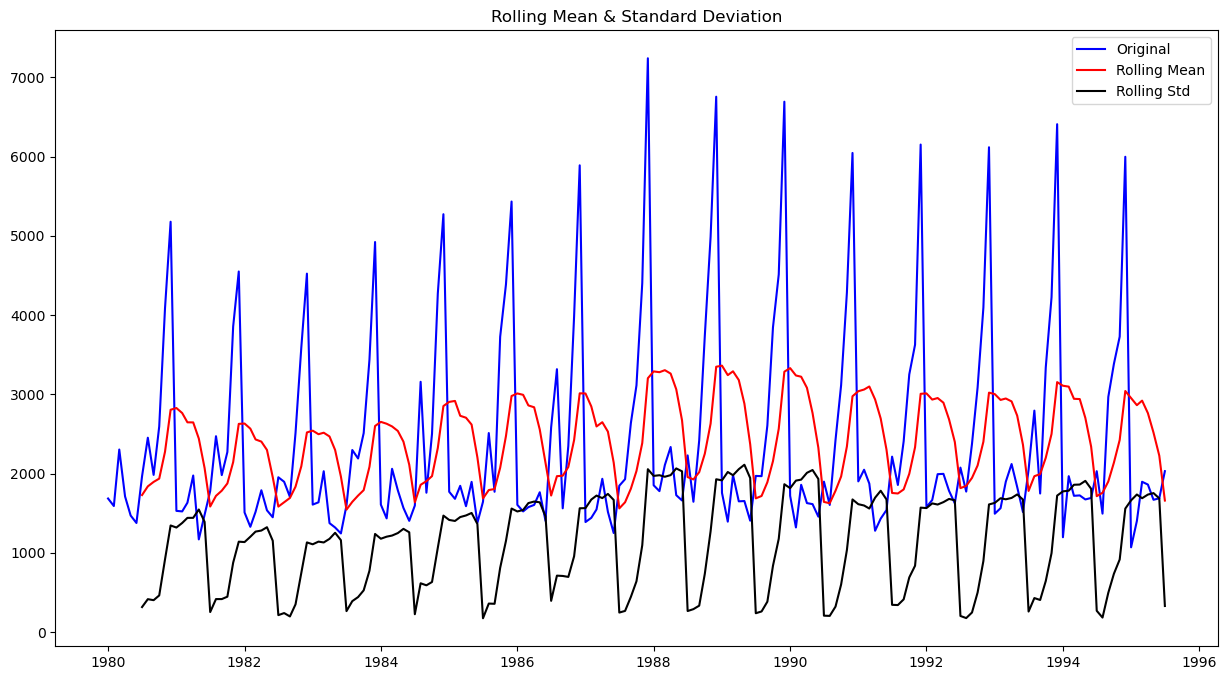

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [122]:
test_stationarity(spark)

We see that at 5% significant level the Time Series is non-stationary.

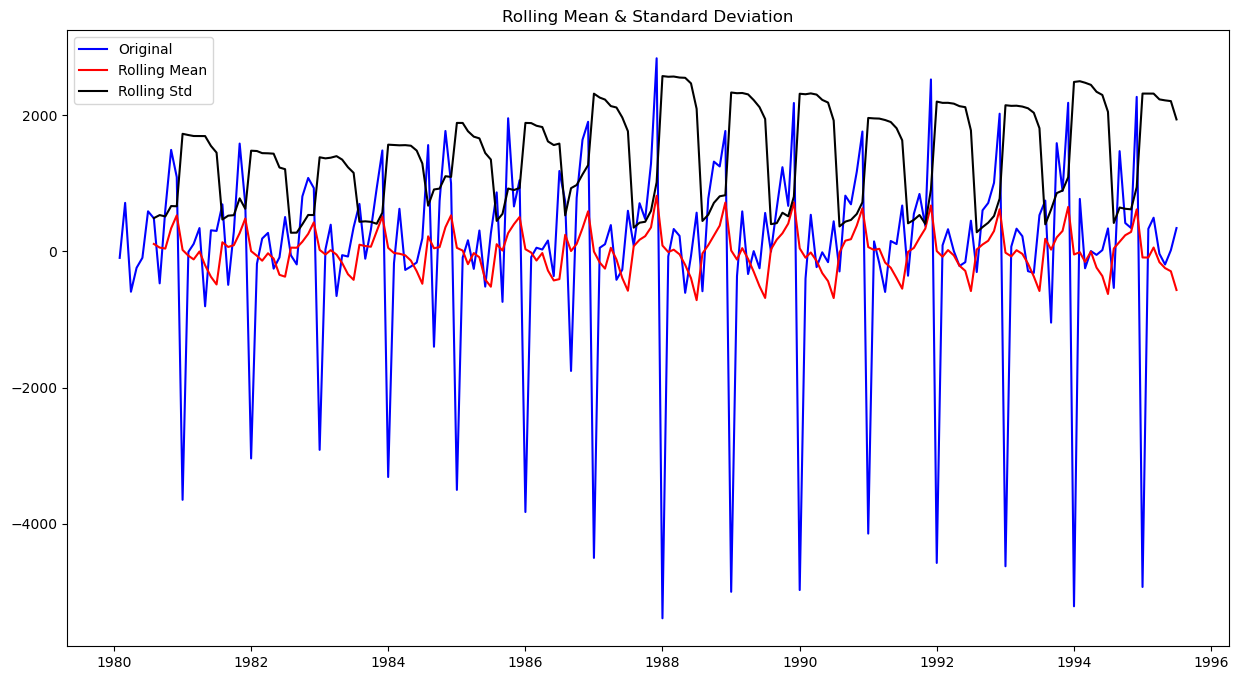

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [123]:
# lets take difference of time series 
test_stationarity(spark.diff().dropna())

As the p-value comes out be **< 0.05** (the significance level) we can we can reject the null hypothesis. Hence, at 0.05 significance level this difference series is stationary

## ACF and PACF PLOTS

Let us look at the ACF and the PACF plots once more.

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

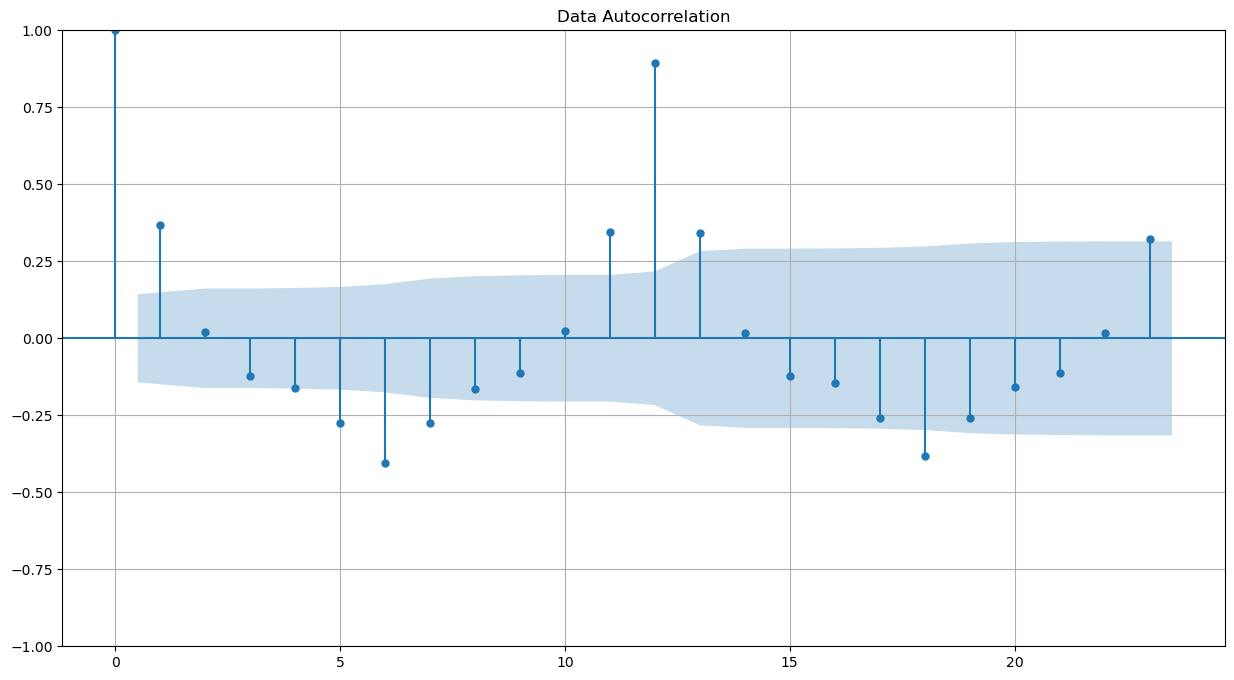

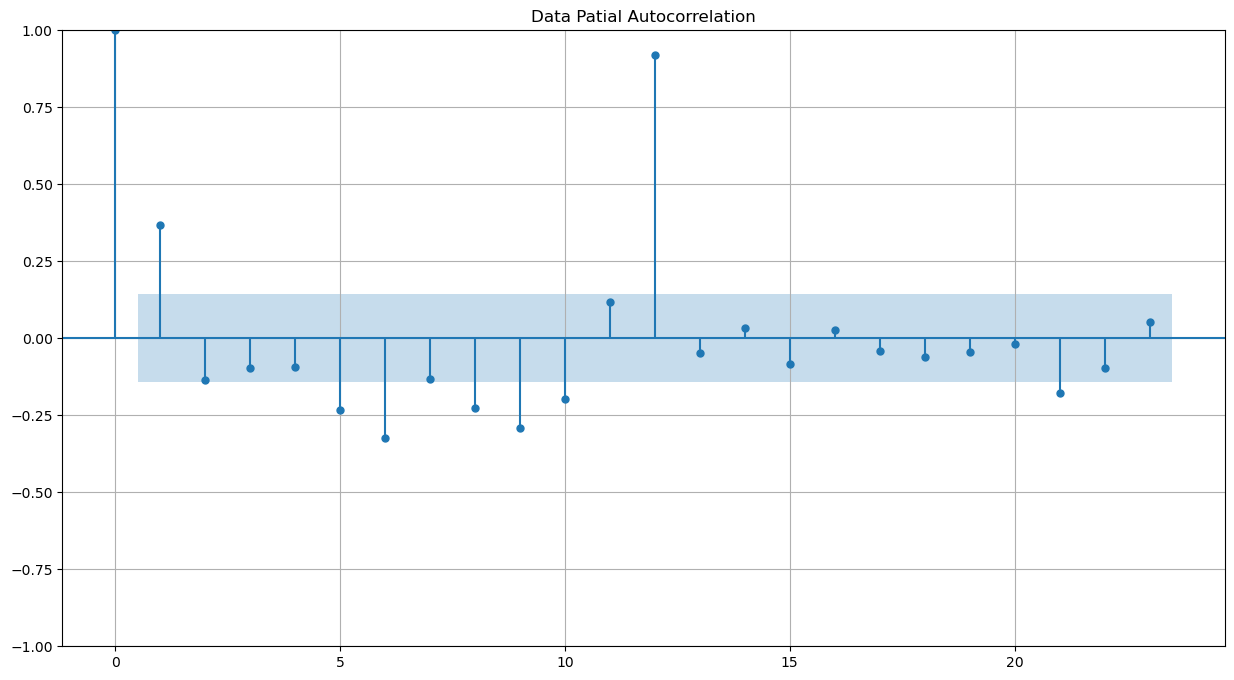

In [125]:
plot_acf(spark['Sparkling'],title='Data Autocorrelation')
plt.grid()
plot_pacf(spark['Sparkling'],title='Data Patial Autocorrelation')
plt.grid()
plt.show()

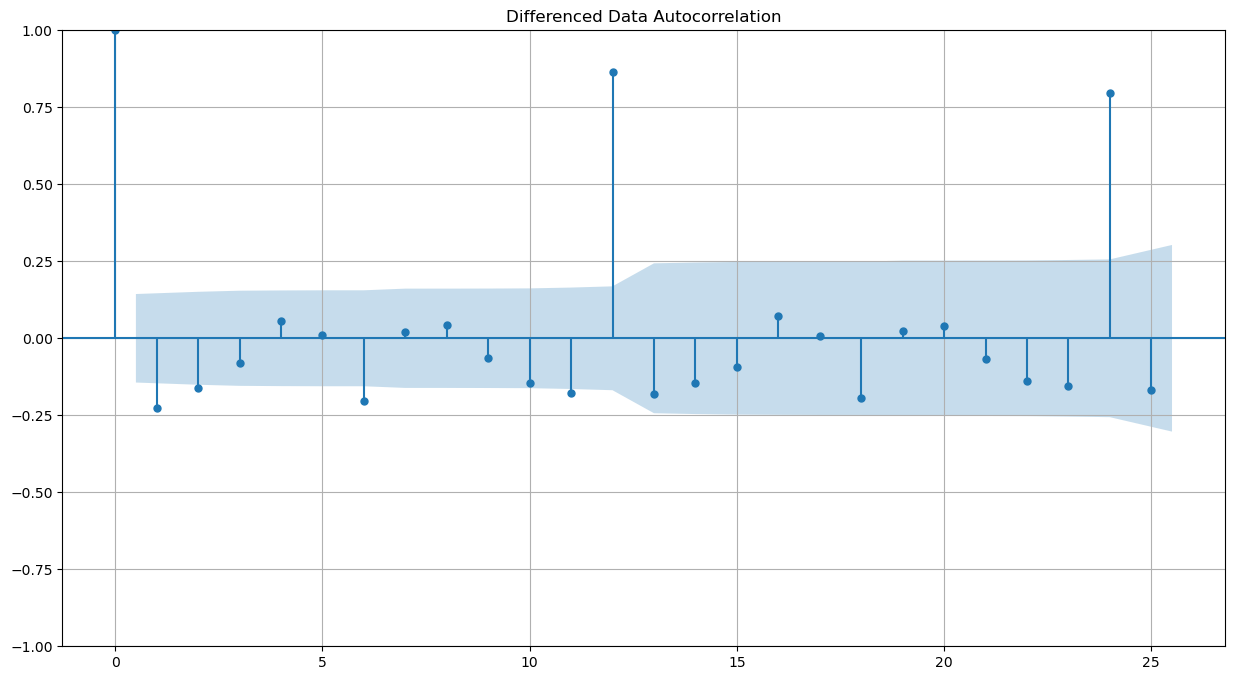

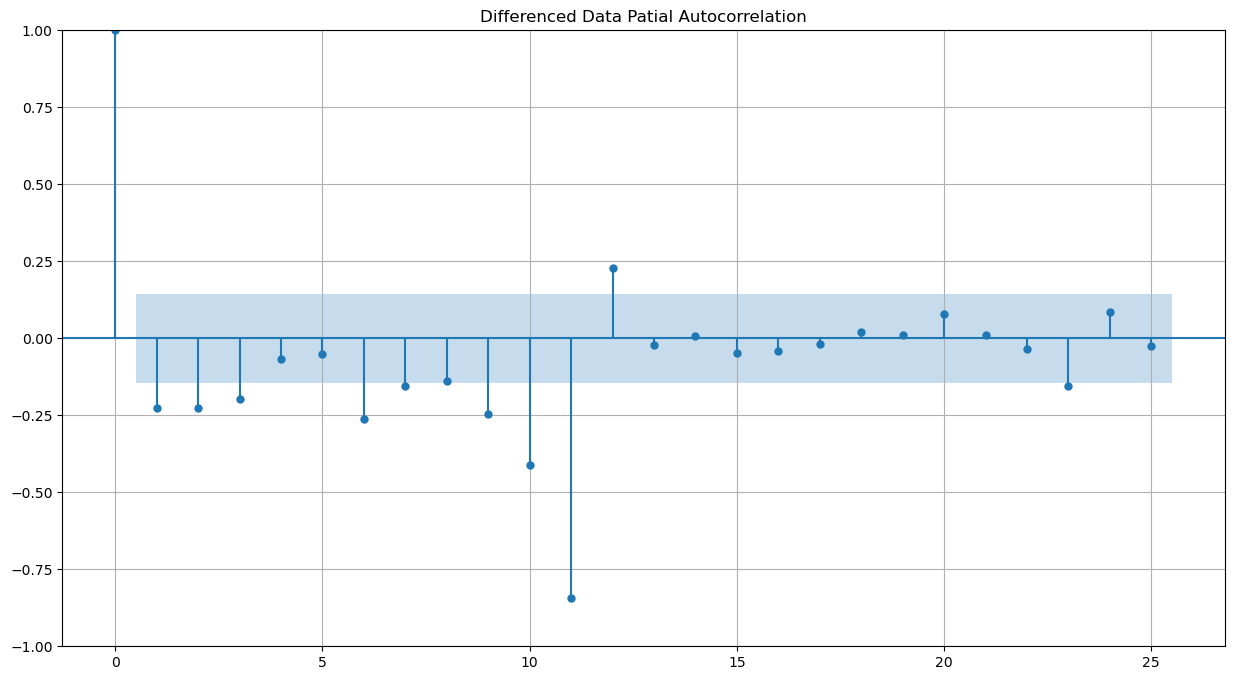

In [126]:
plot_acf(spark['Sparkling'].diff().dropna(),lags=25,title='Differenced Data Autocorrelation')
plt.grid()
plot_pacf(spark['Sparkling'].diff().dropna(),lags=25,title='Differenced Data Patial Autocorrelation',method = 'ywm')
plt.grid()
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.From the above plots we can say that **'p' value is 3 and 'q' values is 2 for the difference series**

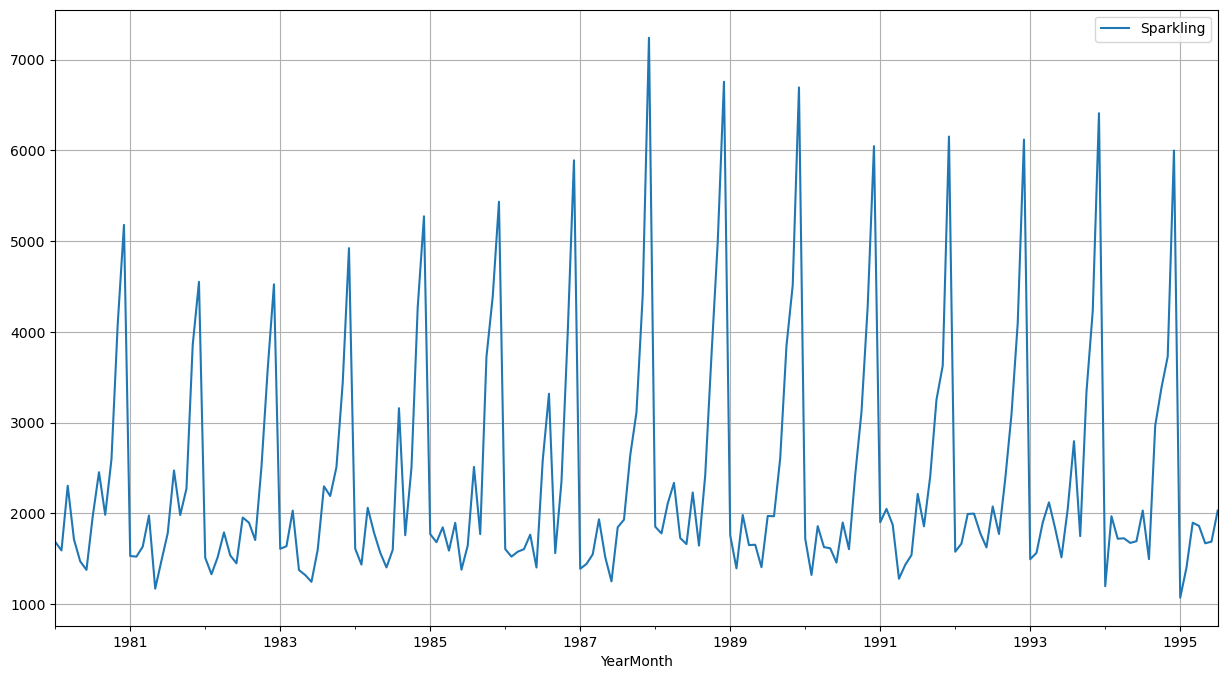

In [127]:
spark.plot()
plt.grid();

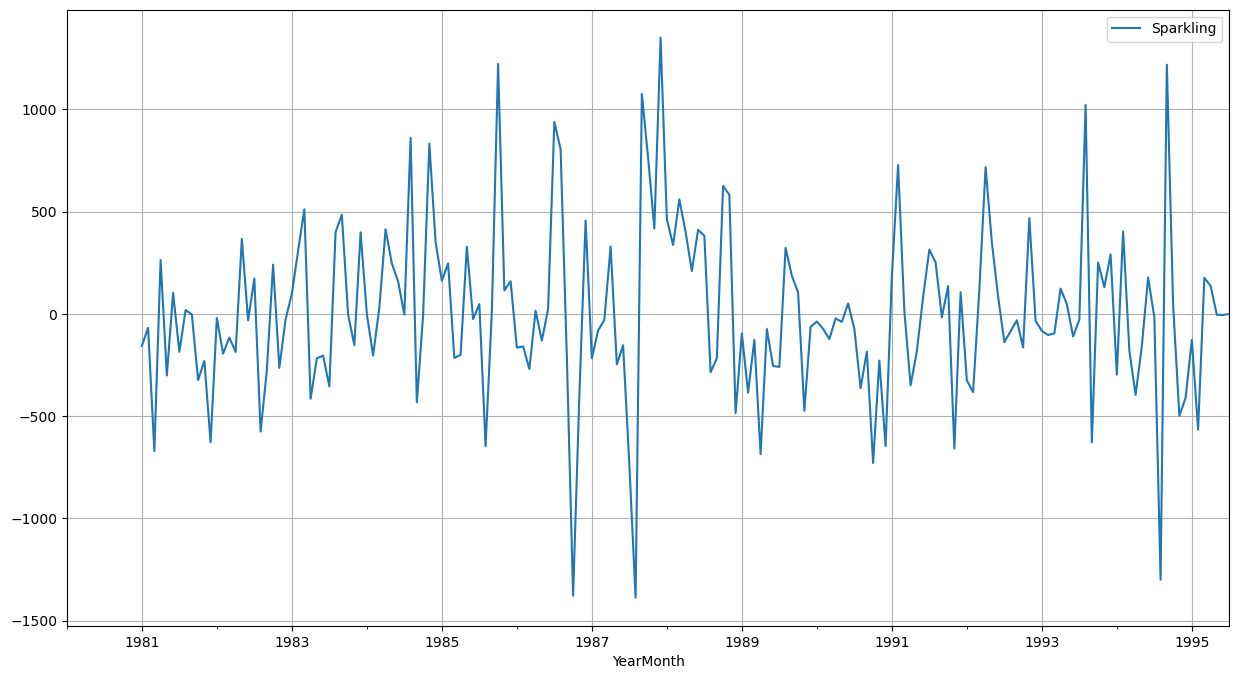

In [128]:
(spark.diff(12)).plot()
plt.grid();

We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first order on the seasonally differenced series.

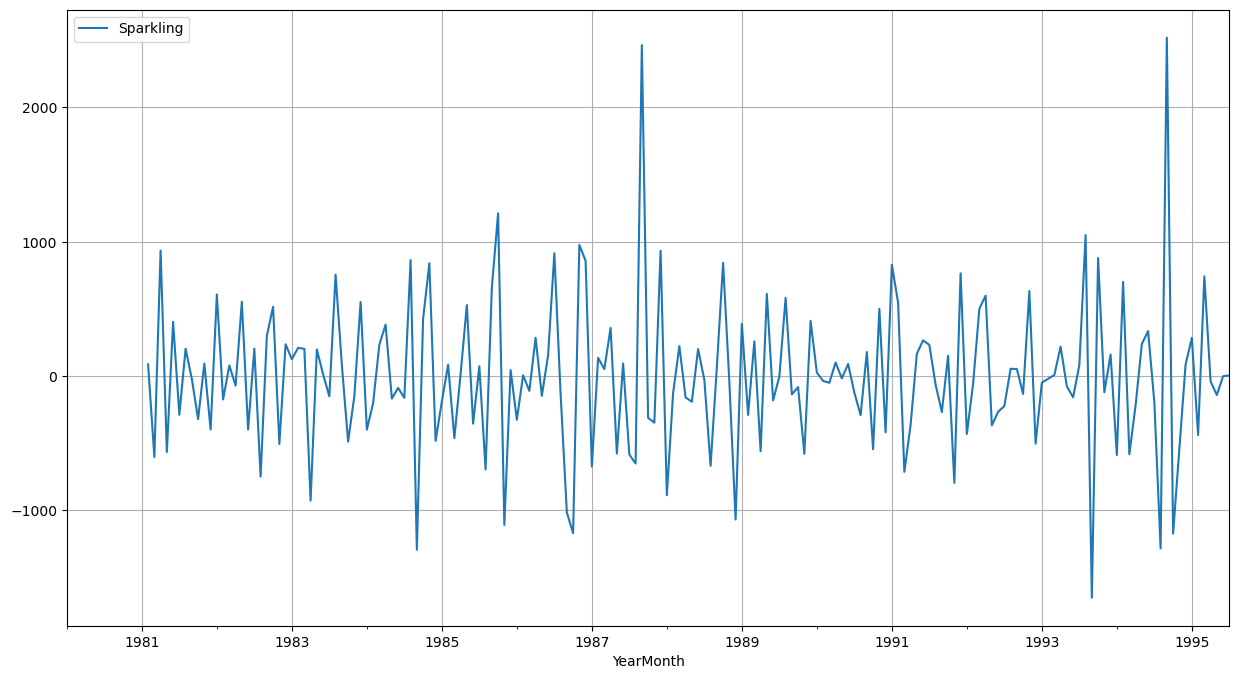

In [129]:
(spark.diff(12)).diff().plot()
plt.grid();

Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

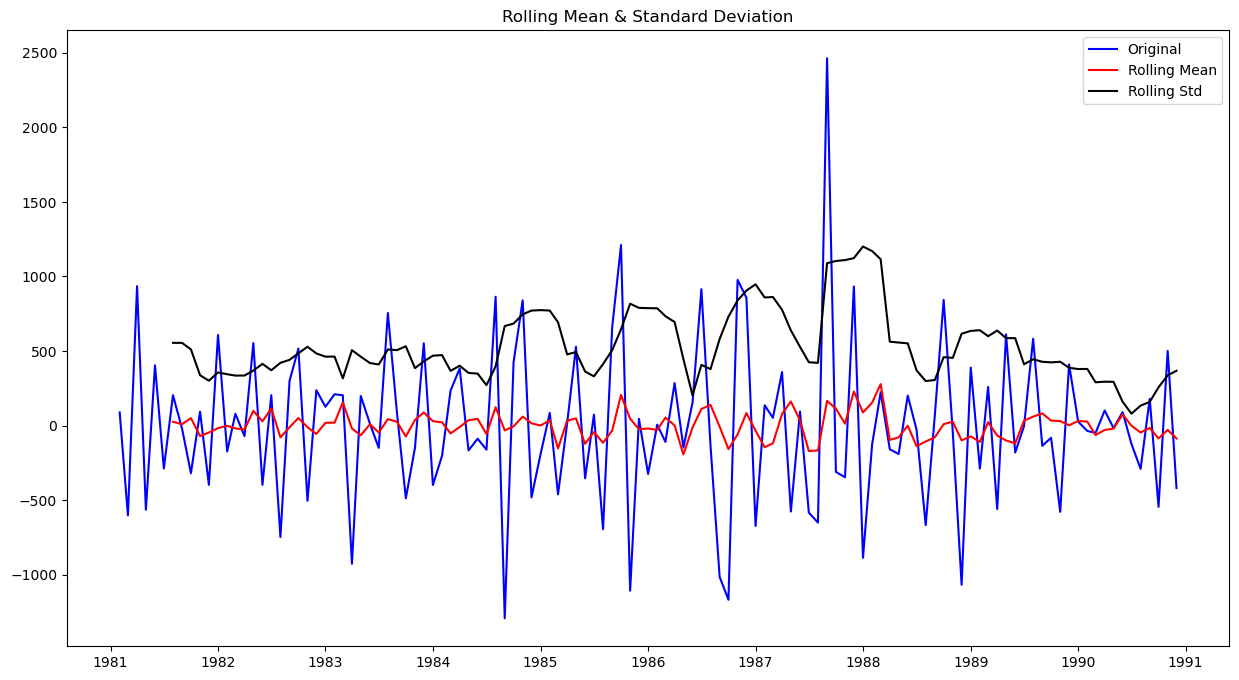

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [130]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

As the p-value is < $\alpha$ i.e. 0.05, we can reject the null hypothesis which means this time series is stationary

Checking the ACF and the PACF plots for the new modified Time Series.

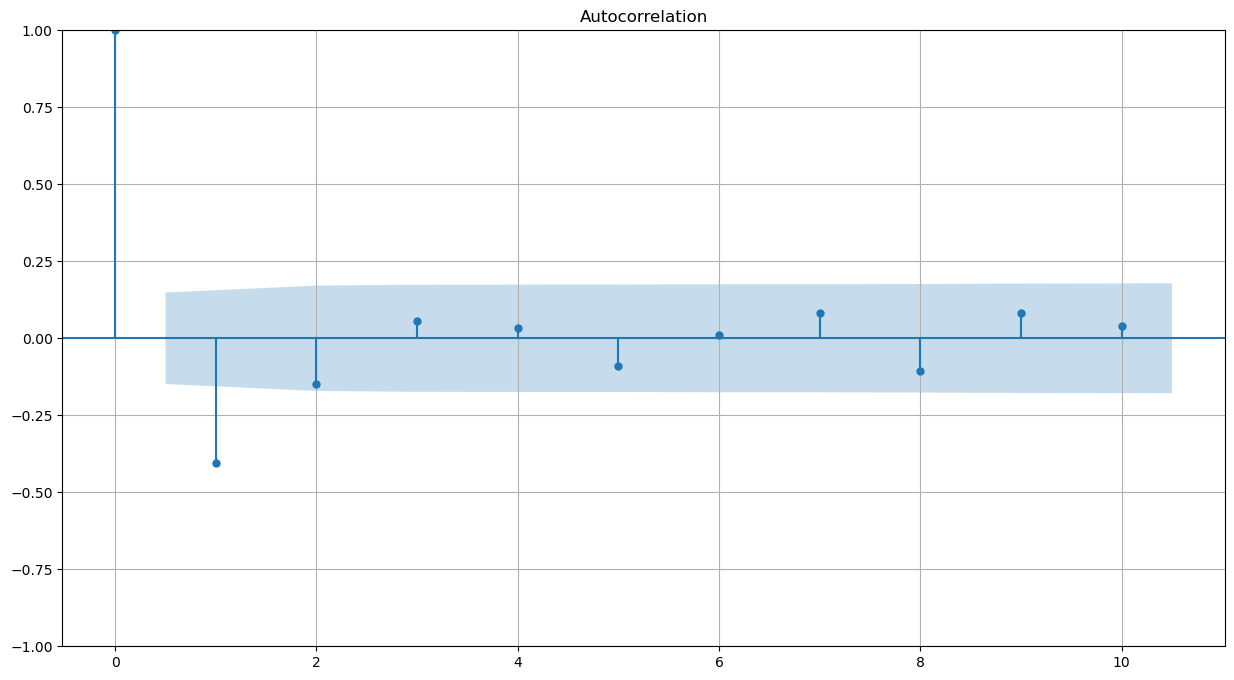

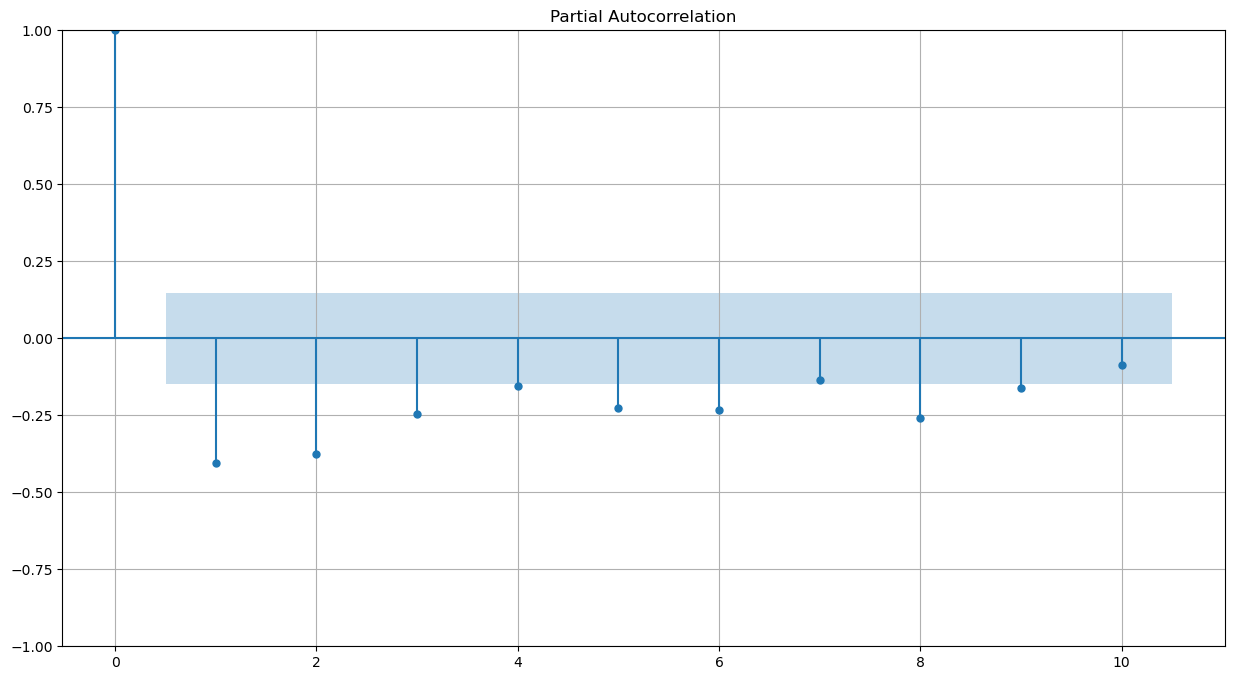

In [131]:
plot_acf((spark.diff(12).dropna()).diff(1).dropna(),lags=10)
plt.grid()

plot_pacf((spark.diff(12).dropna()).diff(1).dropna(),lags=10);
plt.grid()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 12. We will keep the **p=3 and q=2**.

The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
The Moving-Average parameter in an SARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0. Remember to check the ACF and the PACF plots only at multiples of 12 (since 12 is the seasonal period).

Now from the ACF and PACF plots of first difference and seasonal first difference series we can see the PACF plot cuts off after 3 and ACF plot cuts off after 1. Hence, the **seasonal parameter P = 3 and Q = 1** 


In [132]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, [1], 12)   Log Likelihood                -599.496
Date:                              Wed, 05 Apr 2023   AIC                           1218.991
Time:                                      16:56:15   BIC                           1242.812
Sample:                                           0   HQIC                          1228.542
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7636      0.193     -3.961      0.000      -1.141      -0.386
ar.L2          0.10

### Predict on the Test Set using this model and evaluate the model

In [133]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=55)

In [134]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1501.551395  446.084693     627.241462    2375.861328
1  1427.124599  462.376215     520.883870    2333.365327
2  1792.454564  462.401996     886.163306    2698.745823
3  1751.185965  463.549362     842.645911    2659.726020
4  1537.651369  463.634777     628.943905    2446.358833

In [135]:
results_SARIMA_manual= pd.DataFrame({'Test RMSE':[metrics.mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)]},
                                 index=['SARIMA(3, 1, 2)(1, 1, 1, 12)'])

resultsDf = pd.concat([resultsDf, results_SARIMA_manual])
resultsDf

Test RMSE
RegressionOnTime                                    1294.440103
NaiveModel                                          3864.279352
SimpleAverage                                       1275.081804
2pointTrailingMovingAverageBest                      813.400684
alpha:0.0496 SES model                              1316.035487
alpha:0.02 SES model                                1279.495201
alpha:0.688,beta:9.9e-05 DES model                  2007.238526
alpha:0.1,beta:0.01 DES model                       1325.222574
Alpha=0.11,Beta=0.06,Gamma=0.4,TripleExponentia...   404.286809
Alpha=0.5,Beta=0.027,Gamma=0.3,TripleExponentia...   318.878582
SARIMA(1, 1, 2)(0, 1, 2, 12)                         382.576745
SARIMA(3, 1, 2)(1, 1, 1, 12)                         330.900001

***

As we can see that the **best model** based on this analysis turns out to be the **Triple Exponential Smoothing Model with parameters Alpha=0.5,Beta=0.027,Gamma=0.3** for whihc RMSE value comes out to be 320.958. Hence, using this model we are going to create a new model. That new model will be trained using the whole time series data available.

In [136]:
final_model_TES = ExponentialSmoothing(endog=spark['Sparkling'],trend='additive',seasonal='multiplicative',freq='MS')

In [137]:
final_model = final_model_TES.fit(smoothing_level=0.5,smoothing_trend=0.027,smoothing_seasonal=0.3,optimized=False,use_brute=True)

In [138]:
final_pred = final_model.forecast(steps=12)

In [139]:
final_pred

1995-08-01    2007.892730
1995-09-01    2689.837996
1995-10-01    3462.833927
1995-11-01    4281.044380
1995-12-01    6713.637050
1996-01-01    1470.643022
1996-02-01    1888.434832
1996-03-01    2092.591669
1996-04-01    1962.951346
1996-05-01    1755.609404
1996-06-01    1668.374209
1996-07-01    2080.900218
Freq: MS, dtype: float64

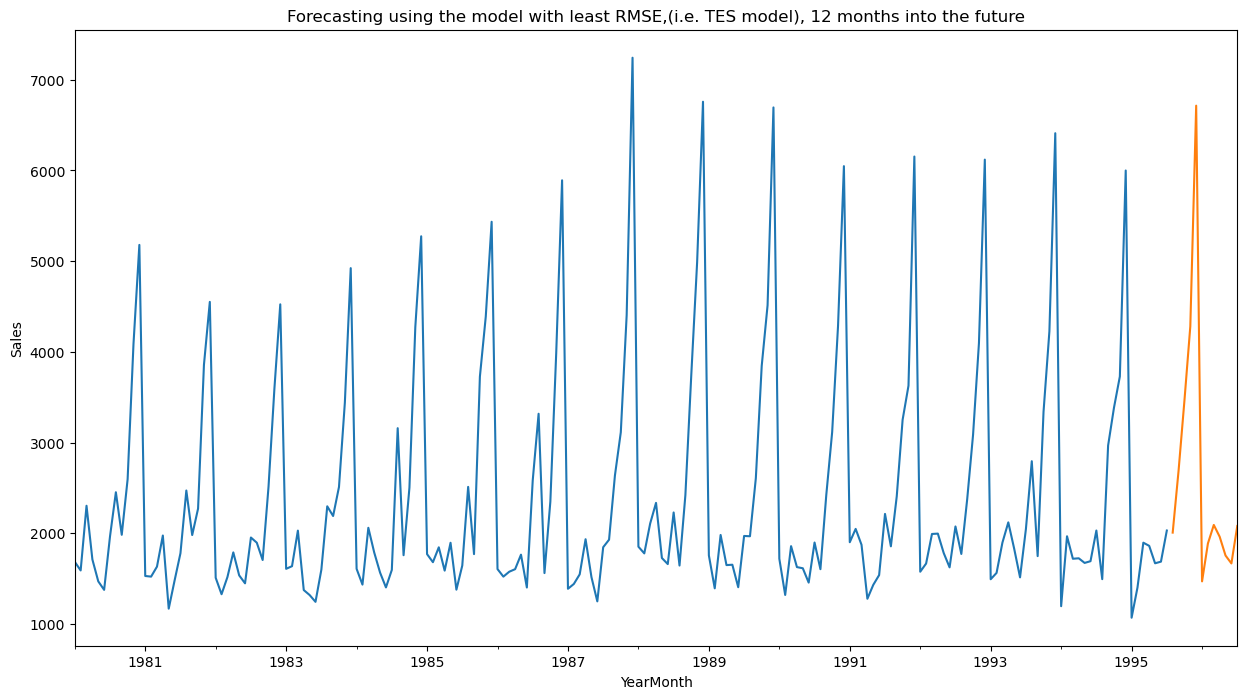

In [140]:
_,ax = plt.subplots(figsize=[15,8])
spark['Sparkling'].plot(ax=ax);
final_pred.plot(ax=ax);
plt.ylabel('Sales');
plt.title('Forecasting using the model with least RMSE,(i.e. TES model), 12 months into the future');

# Thank You!